<a href="https://colab.research.google.com/github/kibuba-njihia/Cirrhosis-Patient-Survival-Prediction/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Business Understanding

## 1.1. Background
Cirrhosis is a chronic liver disease characterized by scarring (fibrosis) and impaired liver function. It is often caused by long-term liver damage due to conditions such as hepatitis, alcohol abuse, and fatty liver disease. As the disease progresses, it can lead to complications like liver failure, hepatic encephalopathy, and increased mortality risk. Predicting survival outcomes in cirrhosis patients is crucial for improving treatment strategies, patient management, and healthcare resource allocation.

## 1.2. Problem Statement
Currently, physicians rely on clinical experience and scoring systems like the Model for End-Stage Liver Disease (MELD) and Child-Pugh Score to estimate a patient’s prognosis. However, these traditional methods have limitations in accurately predicting survival. This project aims to leverage machine learning to build a predictive model that estimates a cirrhosis patient's survival likelihood based on medical history, lab results, and demographic factors.

## 1.3. Objectives
The main objectives of this project are:

- Develop a predictive model that estimates survival time for cirrhosis patients based on available clinical and demographic data.
- Identify key risk factors that influence patient outcomes.
- Assist healthcare providers in making data-driven decisions for personalized treatment and early interventions.
- Improve patient care by providing more accurate survival estimates, which can aid in prioritizing liver transplants and resource allocation.
## 1.4. Key Stakeholders
Healthcare Providers: Physicians, hepatologists, and transplant specialists who can use the model to guide treatment decisions.
Patients and Families: Individuals affected by cirrhosis who can benefit from more precise survival predictions.
Hospitals and Clinics: Medical institutions that can optimize resource allocation based on risk stratification.
Healthcare Researchers: Academics and data scientists studying cirrhosis progression and treatment effectiveness.
## 1.5. Success Criteria
Model Performance: Achieve high accuracy, precision, and recall in survival predictions, outperforming traditional clinical models.
Clinical Interpretability: Ensure that the model provides interpretable insights that align with medical knowledge.
Actionability: Enable healthcare providers to use predictions for early interventions and patient prioritization.
## 1.6. Challenges & Considerations
Data Quality: Handling missing values, inconsistencies, and imbalanced classes in survival data.
Ethical Concerns: Ensuring fair predictions without bias against demographic or socioeconomic factors.
Regulatory Compliance: Adhering to healthcare privacy laws (e.g., HIPAA, GDPR) when working with patient data.
Model Generalization: Ensuring the model performs well on diverse patient populations across different regions.

# 2. Data Understanding

The data used for this project was downloaded from [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/878/cirrhosis+patient+survival+prediction+dataset-1). This data was sourced from a Mayo Clinic study on primary biliary cirrhosis (PBC) of the liver carried out from 1974 to 1984. The data has 17 columns. The columns are :

| Variable Name  | Role     | Type        | Demographic | Description | Units | Missing Values |
|---------------|---------|------------|------------|-------------|-------|----------------|
| ID           | ID      | Integer    | -          | Unique identifier | -     | No             |
| N_Days       | Other   | Integer    | -          | Number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986 | - | No |
| Drug         | Feature | Categorical | -          | Type of drug: D-penicillamine or placebo. Type of medication may impact the effectiveness of treatment, thus affecting status. | - | Yes |
| Age         | Feature | Integer    | Age        | Age. Age could be related to disease progression; older patients may have a different status trajectory. | Days | No |
| Sex         | Feature | Categorical | Sex        | Gender: M (male) or F (female). Biological sex may influence disease patterns and response to treatment, thereby affecting status. | - | No |
| Ascites     | Feature | Categorical | -          | Presence of ascites: N (No) or Y (Yes). The accumulation of fluid in the abdomen, often a sign of advanced liver disease, which could indicate a poorer status. | - | Yes |
| Hepatomegaly | Feature | Categorical | -          | Presence of hepatomegaly: N (No) or Y (Yes). Enlargement of the liver. If present, it might suggest more serious liver disease and potentially a poorer status. | - | Yes |
| Spiders     | Feature | Categorical | -          | Presence of spiders: N (No) or Y (Yes). Spider angiomas are small, spider-like capillaries visible under the skin, associated with liver disease and could indicate a more advanced disease affecting status. | - | Yes |
| Edema       | Feature | Categorical | -          | Presence of edema: N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy). Swelling caused by excess fluid trapped in the body's tissues, often worsening the prognosis and indicating poorer status. | - | No |
| Bilirubin   | Feature | Continuous  | -          | Serum bilirubin. High levels can indicate liver dysfunction and may correlate with more advanced disease and poorer status. | mg/dL | No |
| Cholesterol | Feature | Integer     | -          | Serum cholesterol. While not directly related to liver function, abnormal levels can be associated with certain liver conditions and overall health status. | mg/dL | Yes |
| Albumin     | Feature | Continuous  | -          | Albumin. Low levels can be a sign of liver disease and can indicate a poorer status due to the liver's reduced ability to synthesize proteins. | g/dL | No |
| Copper      | Feature | Integer     | -          | Urine copper. Elevated in certain liver diseases (like Wilson's disease), and could affect status if levels are abnormally high. | µg/day | Yes |
| Alk_Phos    | Feature | Continuous  | -          | Alkaline phosphatase. An enzyme related to the bile ducts; high levels might indicate blockage or other issues related to the liver. | U/Liter | Yes |
| SGOT        | Feature | Continuous  | -          | SGOT. An enzyme that, when elevated, can indicate liver damage and could correlate with a worsening status. | U/mL | Yes |
| Triglycerides | Feature | Integer   | -          | Triglycerides. Though mainly a cardiovascular risk indicator, they can be affected by liver function and, by extension, the status of the patient. | - | Yes |
| Platelets   | Feature | Integer     | -          | Platelets per cubic. Low platelet count can be a result of advanced liver disease and can indicate a poorer status. | mL/1000 | Yes |
| Prothrombin | Feature | Continuous  | -          | Prothrombin time. A measure of how long it takes blood to clot. Liver disease can cause increased times, indicating poorer status. | s | Yes |
| Stage       | Feature | Categorical | -          | Histologic stage of disease (1, 2, 3, or 4). The stage of liver disease, which directly correlates with the patient's status - the higher the stage, the more serious the condition. | - | Yes |
| Status      | Target  | Categorical | -          | Status of the patient: C (censored), CL (censored due to liver transplant), or D (death) | - | No |


# 3. Data Preparation

In [3]:
# !pip install catboost

In [4]:
#libraries

import pandas as pd
import numpy as np
import math
from scipy.stats.mstats import winsorize

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [5]:
train = pd.read_csv('https://raw.githubusercontent.com/kibuba-njihia/Cirrhosis-Patient-Survival-Prediction/refs/heads/main/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/kibuba-njihia/Cirrhosis-Patient-Survival-Prediction/refs/heads/main/test.csv')
original = pd.read_csv('https://raw.githubusercontent.com/kibuba-njihia/Cirrhosis-Patient-Survival-Prediction/refs/heads/main/cirrhosis.csv')

data = pd.concat([train,original], axis=0)
data.head()

id  N_Days             Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
0  0.0     999  D-penicillamine  21532   M       N            N       N     N   
1  1.0    2574          Placebo  19237   F       N            N       N     N   
2  2.0    3428          Placebo  13727   F       N            Y       Y     Y   
3  3.0    2576          Placebo  18460   F       N            N       N     N   
4  4.0     788          Placebo  16658   F       N            Y       N     N   

   Bilirubin  ...  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0        2.3  ...     3.35   172.0    1601.0  179.80           63.0   
1        0.9  ...     3.54    63.0    1440.0  134.85           88.0   
2        3.3  ...     3.55   131.0    1029.0  119.35           50.0   
3        0.6  ...     3.50    58.0    1653.0   71.30           96.0   
4        1.1  ...     3.65    63.0    1181.0  125.55           96.0   

   Platelets  Prothrombin  Stage  Status  ID  
0      394.0          9.7    3.0       D NaN  
1      361.0         11.0    3.0       C NaN  
2      199.0         11.7    4.0       D NaN  
3      269.0         10.7    3.0       C NaN  
4      298.0         10.6    4.0       C NaN  

[5 rows x 21 columns]

In [6]:
print(f"The data has {data.shape[0]:,} rows and {data.shape[1]} columns.")

The data has 8,323 rows and 21 columns.


In [7]:
df = data.copy()

## 3.1 Data Cleaning

In [8]:
# checking if the data has duplicate values

print(f"The data has {df.duplicated().sum()} duplicates.")

The data has 0 duplicates.


In [9]:
df.drop(columns=['id', 'ID'], inplace=True)

In [10]:
# checking the data type of columns

df.dtypes

N_Days             int64
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
Status            object
dtype: object

In [11]:
df.nunique()

N_Days           495
Drug               2
Age              397
Sex                2
Ascites            2
Hepatomegaly       2
Spiders            2
Edema              3
Bilirubin        117
Cholesterol      227
Albumin          167
Copper           171
Alk_Phos         364
SGOT             206
Tryglicerides    154
Platelets        252
Prothrombin       50
Stage              4
Status             3
dtype: int64

All columns have the right data type , except `Stage`. This is aso an object as it holds the stages of the disease in a patients. This will be converted to object

In [12]:
df['Stage'] = df['Stage'].astype('object')

In [15]:
# separating numerical and categorical columns

num_cols = df.select_dtypes(include=np.number).columns.to_list()
cat_cols = df.select_dtypes(exclude=np.number).columns.to_list()
print(num_cols)
print(cat_cols)

['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage', 'Status']


In [16]:
# checking unique values of categorical columns
for col in cat_cols:
    print(col)
    print(df[col].unique())
    print('-'*50)

Drug
['D-penicillamine' 'Placebo' nan]
--------------------------------------------------
Sex
['M' 'F']
--------------------------------------------------
Ascites
['N' 'Y' nan]
--------------------------------------------------
Hepatomegaly
['N' 'Y' nan]
--------------------------------------------------
Spiders
['N' 'Y' nan]
--------------------------------------------------
Edema
['N' 'Y' 'S']
--------------------------------------------------
Stage
[3.0 4.0 2.0 1.0 nan]
--------------------------------------------------
Status
['D' 'C' 'CL']
--------------------------------------------------


All values are unique, hence, no further processing needed. Only dropping the missing values

In [17]:
# checking if the data has any missing values
missing = pd.DataFrame({
    'count': df.isna().sum(),
    'percentage' : round(df.isna().sum()/len(df)*100, 2)
})
missing.loc[missing['count']>0].sort_values(by='count', ascending=False)

count  percentage
Tryglicerides    136        1.63
Cholesterol      134        1.61
Copper           108        1.30
Drug             106        1.27
Ascites          106        1.27
Hepatomegaly     106        1.27
Spiders          106        1.27
Alk_Phos         106        1.27
SGOT             106        1.27
Platelets         11        0.13
Stage              6        0.07
Prothrombin        2        0.02

In [ ]:
# checking the rows with missing data in cholestrol and trygliceride columns
df[df[['Tryglicerides','Cholesterol' ]].isna().all(axis=1)]

N_Days             Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
13     1217          Placebo  20535   M       Y            Y       N     Y   
39     4467  D-penicillamine  17046   F       N            N       N     N   
40     1350  D-penicillamine  12285   F       N            Y       N     N   
41     4453          Placebo  12307   F       N            Y       Y     N   
44     4025          Placebo  15265   F       N            N       N     N   
..      ...              ...    ...  ..     ...          ...     ...   ...   
413     681              NaN  24472   F     NaN          NaN     NaN     N   
414    1103              NaN  14245   F     NaN          NaN     NaN     N   
415    1055              NaN  20819   F     NaN          NaN     NaN     N   
416     691              NaN  21185   F     NaN          NaN     NaN     N   
417     976              NaN  19358   F     NaN          NaN     NaN     N   

     Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
13         0.8          NaN     2.27    43.0     728.0   71.00            NaN   
39         1.3          NaN     3.34   105.0   11046.6  104.49            NaN   
40         6.8          NaN     3.26    96.0    1215.0  151.90            NaN   
41         2.1          NaN     3.54   122.0    8778.0   56.76            NaN   
44         0.6          NaN     3.93    19.0    1826.0   71.30            NaN   
..         ...          ...      ...     ...       ...     ...            ...   
413        1.2          NaN     2.96     NaN       NaN     NaN            NaN   
414        0.9          NaN     3.83     NaN       NaN     NaN            NaN   
415        1.6          NaN     3.42     NaN       NaN     NaN            NaN   
416        0.8          NaN     3.75     NaN       NaN     NaN            NaN   
417        0.7          NaN     3.29     NaN       NaN     NaN            NaN   

     Platelets  Prothrombin Stage Status  
13       156.0         11.0   4.0      D  
39       358.0         11.0   4.0      C  
40       226.0         11.7   4.0      D  
41       344.0         11.0   4.0      C  
44       474.0         10.9   2.0      C  
..         ...          ...   ...    ...  
413      174.0         10.9   3.0      D  
414      180.0         11.2   4.0      C  
415      143.0          9.9   3.0      C  
416      269.0         10.4   3.0      C  
417      350.0         10.6   4.0      C  

[134 rows x 19 columns]

Most of the rows with missing `Cholesterol` also have  `Tryglicerides` missing. Since these may be important features and cannot be dropped imputation will be done. It can be noted that also some rows with the same columns having missing values, some other columns are also missing.Median imputation will be used since it appears the missing values are missing completely at random(MCAR). Also, the distribution of the dataset will be checked to further solidify this decision. For the categorical columns, the mode will be used to impute

In [ ]:
missing_columns = missing.loc[missing['count']>0].sort_values(by='count', ascending=False).index.to_list()
missing_columns

['Tryglicerides',
 'Cholesterol',
 'Copper',
 'Drug',
 'Ascites',
 'Hepatomegaly',
 'Spiders',
 'Alk_Phos',
 'SGOT',
 'Platelets',
 'Stage',
 'Prothrombin']

In [ ]:
missing_columns_num = [col for col in missing_columns if col in num_cols]
missing_columns_cat = [col for col in missing_columns if col in cat_cols]

In [ ]:

for i in missing_columns:
    if i in num_cols:
        print(f"{i} : skew is {df[i].skew()} and kurtosis is {df[i].kurtosis()}")

Tryglicerides : skew is 2.6397396601897776 and kurtosis is 14.962322695359475
Cholesterol : skew is 3.672451627234327 and kurtosis is 18.017069731165986
Copper : skew is 2.683175825007906 and kurtosis is 10.077241667563442
Alk_Phos : skew is 3.1880287915606043 and kurtosis is 11.517249737145036
SGOT : skew is 1.5357690032516118 and kurtosis is 5.755176557898979
Platelets : skew is 0.4307962803014562 and kurtosis is 0.3717516500575311
Prothrombin : skew is 1.4107059891445322 and kurtosis is 5.291408497149636


In [ ]:
missing_columns_num

['Tryglicerides',
 'Cholesterol',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Platelets',
 'Prothrombin']

In [ ]:
# fig, axes = plt.subplots(nrows=math.ceil(len(missing_columns_num) /4), ncols=4, figsize=(20, 15))
# axes= axes.flatten()
# for idx, col in enumerate(missing_columns_num):
#     sns.histplot(data=df, x=col, kde=True, bins=30, ax=axes[idx])

# #plt.suptitle("Distribution of missing columns")

# # for j in range(idx + 1, len(axes)):
# #     axes[j].axis('off')

# plt.tight_layout();

The data is skewed, so median will be used to impute the in the numerical columns since mean is affected by outliers..

In [ ]:
# imputing missing values

num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# fit and transform missing values
df[missing_columns_num] = num_imputer.fit_transform(df[missing_columns_num])
df[missing_columns_cat] = cat_imputer.fit_transform(df[missing_columns_cat])

In [ ]:
df.isna().sum()

N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

## 3.2 EDA

### 3.2.1 Univariate Analysis

In [ ]:
df['Status'].value_counts()

Status
C     5197
D     2826
CL     300
Name: count, dtype: int64

In [ ]:
# Define folder path
import os
output_folder = r"C:\Users\njamb\Desktop\DataScience\CirrhosisPatientSurvivalPrediction\reports\figures"

# Create the folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

In [ ]:
# # Define number of rows and columns for subplots
# ncols_cat = 3
# nrows_cat = math.ceil(len(cat_cols) / ncols_cat)

# fig, axes = plt.subplots(nrows=nrows_cat, ncols=ncols_cat, figsize=(15, 5 * nrows_cat))
# axes = axes.flatten()

# for idx, col in enumerate(cat_cols):
#     fig_single, ax = plt.subplots(figsize=(5, 5))  # Create a separate figure for each plot
#     sns.countplot(data=df, x=col, ax=ax)
#     ax.set_title(f'Distribution of {col}')

#     # Annotate the bars with percentages
#     total = len(df[col])
#     for p in ax.patches:
#         percentage = f"{round((p.get_height()/total)*100, 1)}%"
#         ax.annotate(
#             text=percentage,
#             xy=(p.get_x() + p.get_width() / 2., p.get_height()),
#             ha='center',
#             va='center',
#             fontsize=9,
#             color='black',
#             xytext=(0, 5),
#             textcoords='offset points'
#         )

#     # Define full file path
#     file_path = os.path.join(output_folder, f"{col}_distribution.png")

#     # Save the figure
#     fig_single.savefig(file_path, bbox_inches='tight')
#     plt.close(fig_single)

# plt.tight_layout()
# plt.show()

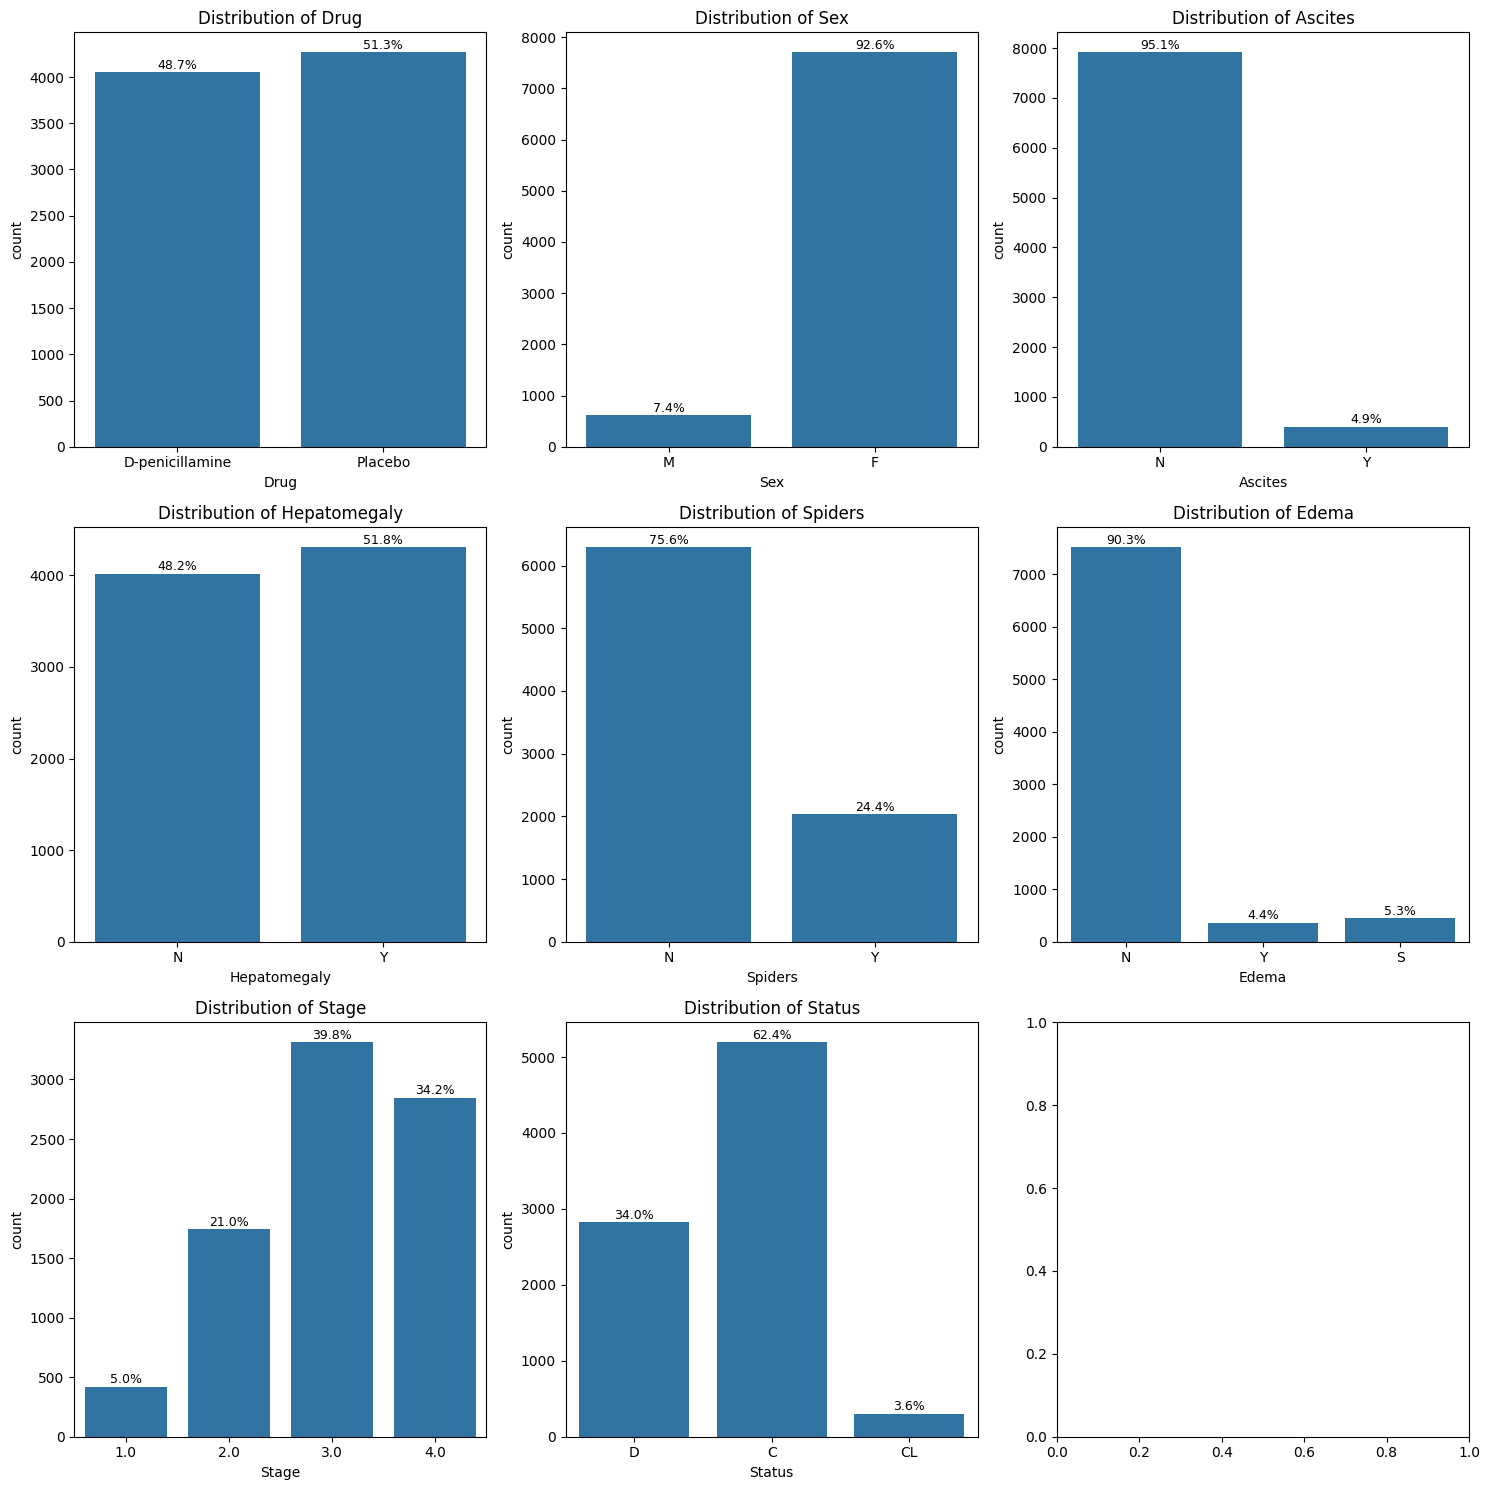

In [ ]:
ncols_cat=3
nrows_cat= math.ceil(len(cat_cols)/ncols_cat)

fig, axes = plt.subplots(nrows=nrows_cat, ncols=ncols_cat, figsize=(15, 15))
axes = axes.flatten()

for idx, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')

    total = len(df[col])
    for p in axes[idx].patches:
        percentage = f"{round((p.get_height()/total)*100, 1)}%"
        axes[idx].annotate(text=percentage, # text of annotation
                    xy=(p.get_x() + p.get_width() / 2., p.get_height()), #The point (x, y) to annotate
                    ha='center',
                    va='center',
                    fontsize=9,
                    color='black',
                    xytext=(0, 5), #The position (x, y) to place the text at
                    textcoords='offset points' #Offset, relative to fontsize, from the xy value
                    )

plt.tight_layout()


- Status: The count plot for 'Status' shows an imbalance, with more patients having Status 'C'  than 'D' .
- Drug: The count plot for 'Drug' shows that 'D-penicillamine' was given to  slighly more patients than the placebo .
- Sex: The count plot for 'Sex' reveals a higher number of female patients compared to male patients.
- Ascites: The count plot for 'Ascites' shows that most patients do not have ascites (fluid accumulation in the abdomen).
- Hepatomegaly: The count plot for 'Hepatomegaly' indicates that a significant number of patients have an enlarged liver.
- Spiders: The count plot for 'Spiders' shows that most patients do not have spider angiomas (small, dilated blood vessels).
- Edema: The count plot for 'Edema' indicates that most patients do not have edema (swelling).
- Stage: The count plot for 'Stage' shows the distribution of patients across different stages of liver disease, with most of the patients having stage 3 and stage 1 having the least

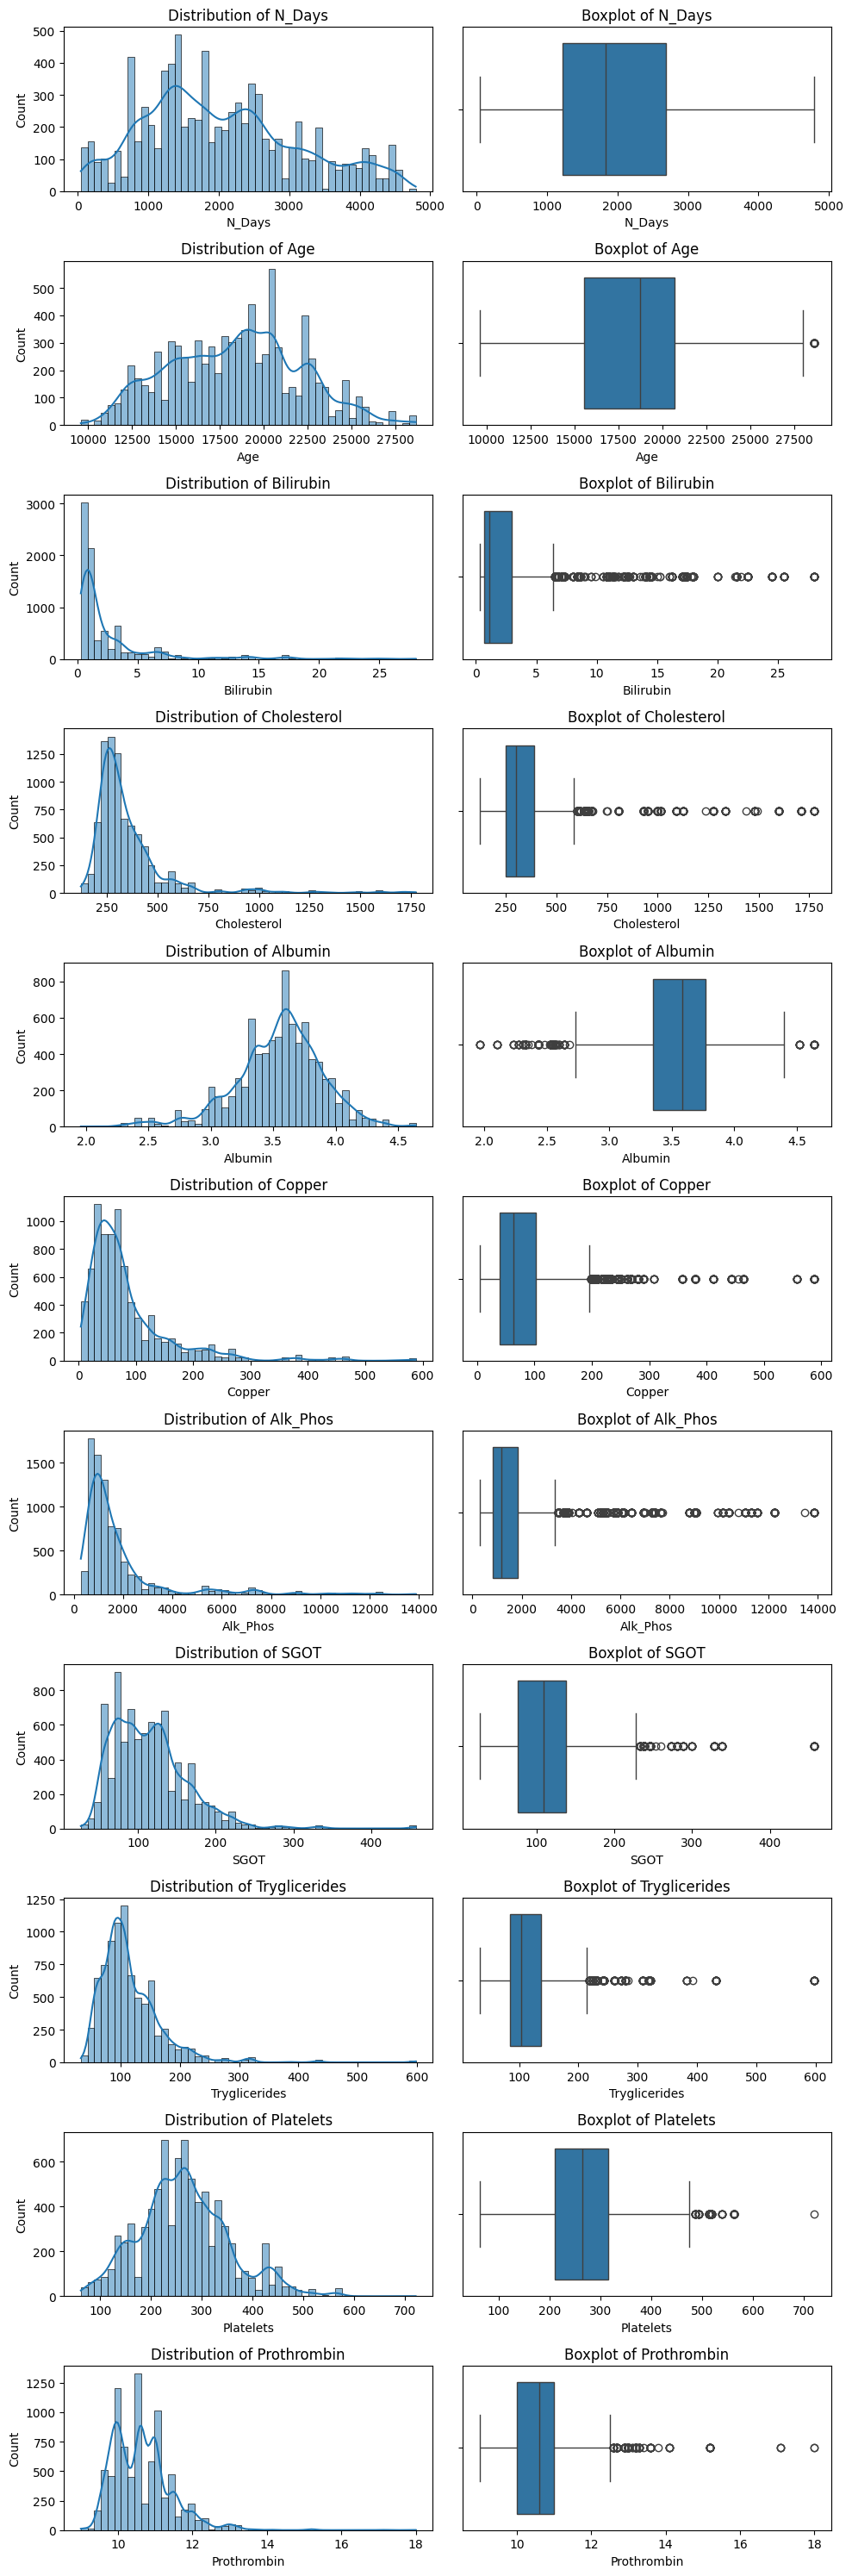

In [ ]:
fig, axes = plt.subplots(nrows=len(num_cols), ncols=2, figsize=(10,30))

for idx, col in enumerate(num_cols):
    sns.histplot(data=df, x=col, kde=True, bins=50, ax=axes[idx, 0])
    axes[idx, 0].set_title(f'Distribution of {col}')
    sns.boxplot(data=df, x=col, ax=axes[idx, 1])
    axes[idx, 1].set_title(f'Boxplot of {col}')
plt.tight_layout()

- Age: The histogram for 'Age' shows a slightly right-skewed distribution, indicating that most patients in the dataset are middle-aged or older, with fewer younger patients.
- Bilirubin: The histogram for 'Bilirubin' reveals a right-skewed distribution with a long tail, suggesting the presence of some patients with very high bilirubin levels (potential outliers).
- Cholesterol: The histogram for 'Cholesterol' shows a roughly normal distribution, but with some outliers on the higher end.
- Albumin: The histogram for 'Albumin' appears to be slightly left-skewed, indicating that most patients have albumin levels clustered around the higher end of the range.
- Copper: The histogram for 'Copper' shows a right-skewed distribution, with a few patients having very high copper levels.
- Alk_Phos: The histogram for 'Alk_Phos' exhibits a right-skewed distribution with a long tail.
- SGOT: The histogram for 'SGOT' also appears to be right-skewed.
- Tryglicerides: The histogram for 'Tryglicerides' shows a right-skewed distribution.
- Platelets: The histogram for 'Platelets' is roughly normal but with some outliers on the lower end.
- Prothrombin: The histogram for 'Prothrombin' is slightly right-skewed.

### 3.2.2. Bivariate Analysis

In [ ]:
# fig, axes = plt.subplots(nrows=nrows_cat, ncols=ncols_cat, figsize=(15,15))

for idx, col in enumerate(cat_cols):
    fig_single, ax = plt.subplots(figsize=(5, 5))  # Create a separate figure for each plot
    sns.countplot(data=df, x=col, ax=ax, hue='Status')
    ax.set_title(f'Distribution of {col} by Status')
    # Annotate the bars with percentages
    total = len(df[col])
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Avoid division by zero
            percentage = f"{round((height/total)*100, 1)}%"
            ax.annotate(
                text=percentage,
                xy=(p.get_x() + p.get_width() / 2., height),
                ha='center',
                va='bottom',  # Align text slightly above the bar
                fontsize=7,
                color='black',
                xytext=(0, 5),
                # xytext=(0, 5 if height > 50 else 10),  # Adjust text height dynamically
                textcoords='offset points'
            )

    # Define full file path
    file_path = os.path.join(output_folder, f"Distribution of {col} by Status.png")

    # Save the figure
    fig_single.savefig(file_path, bbox_inches='tight')
    plt.close(fig_single)

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

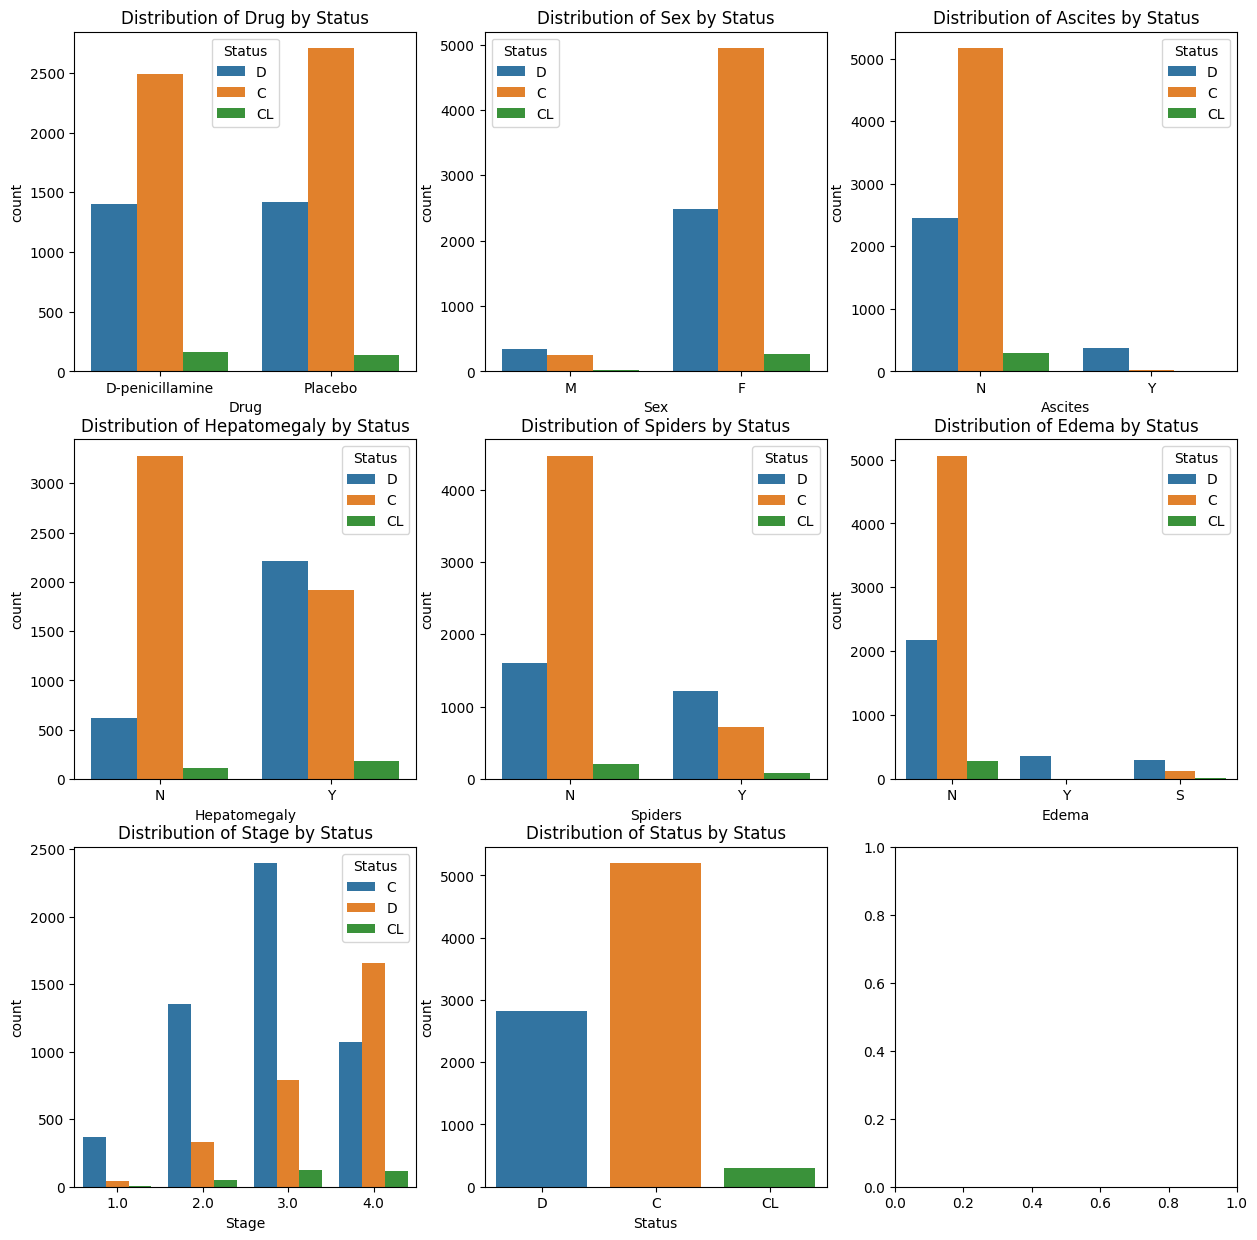

In [ ]:
fig, axes = plt.subplots(nrows=nrows_cat, ncols=ncols_cat, figsize=(15,15))
axes = axes.flatten()

for idx, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, hue='Status', ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col} by Status')


- Drug: The plot shows that patients with Status 'D' (decompensated cirrhosis) are more likely to be on 'Placebo' or 'D-penicillamine', while patients with Status 'C' (compensated cirrhosis) are more likely to be on 'Placebo'. This suggests potential differences in treatment effectiveness or disease stage at which treatments are initiated.

- Sex: The plot shows that females are more likely to have Status 'C' (compensated cirrhosis), while males are more likely to have Status 'D' (decompensated cirrhosis). This could indicate a sex-related difference in disease progression or outcomes.

- Ascites: The plot reveals that the presence of ascites is strongly associated with Status 'D' (decompensated cirrhosis). Most patients with ascites have Status 'D', indicating a more severe stage of the disease.

- Hepatomegaly: The plot shows a similar trend where patients with hepatomegaly (enlarged liver) are more likely to have Status 'D' (decompensated cirrhosis). This further supports the association with disease severity.

- Spiders: The plot indicates that patients with spider angiomas are more likely to have Status 'D' (decompensated cirrhosis), again suggesting a relationship with disease severity.

- Edema: The plot shows that the presence of edema is more common in patients with Status 'D' (decompensated cirrhosis), particularly those with 'Swelling of legs' or 'Swelling of legs and abdomen'.

- Stage: The plot clearly shows a relationship between Stage and Status. Patients with higher stages of liver disease are more likely to have Status 'D' (decompensated cirrhosis), indicating disease progression.

In [ ]:
math.ceil(len(num_cols)/3)

4

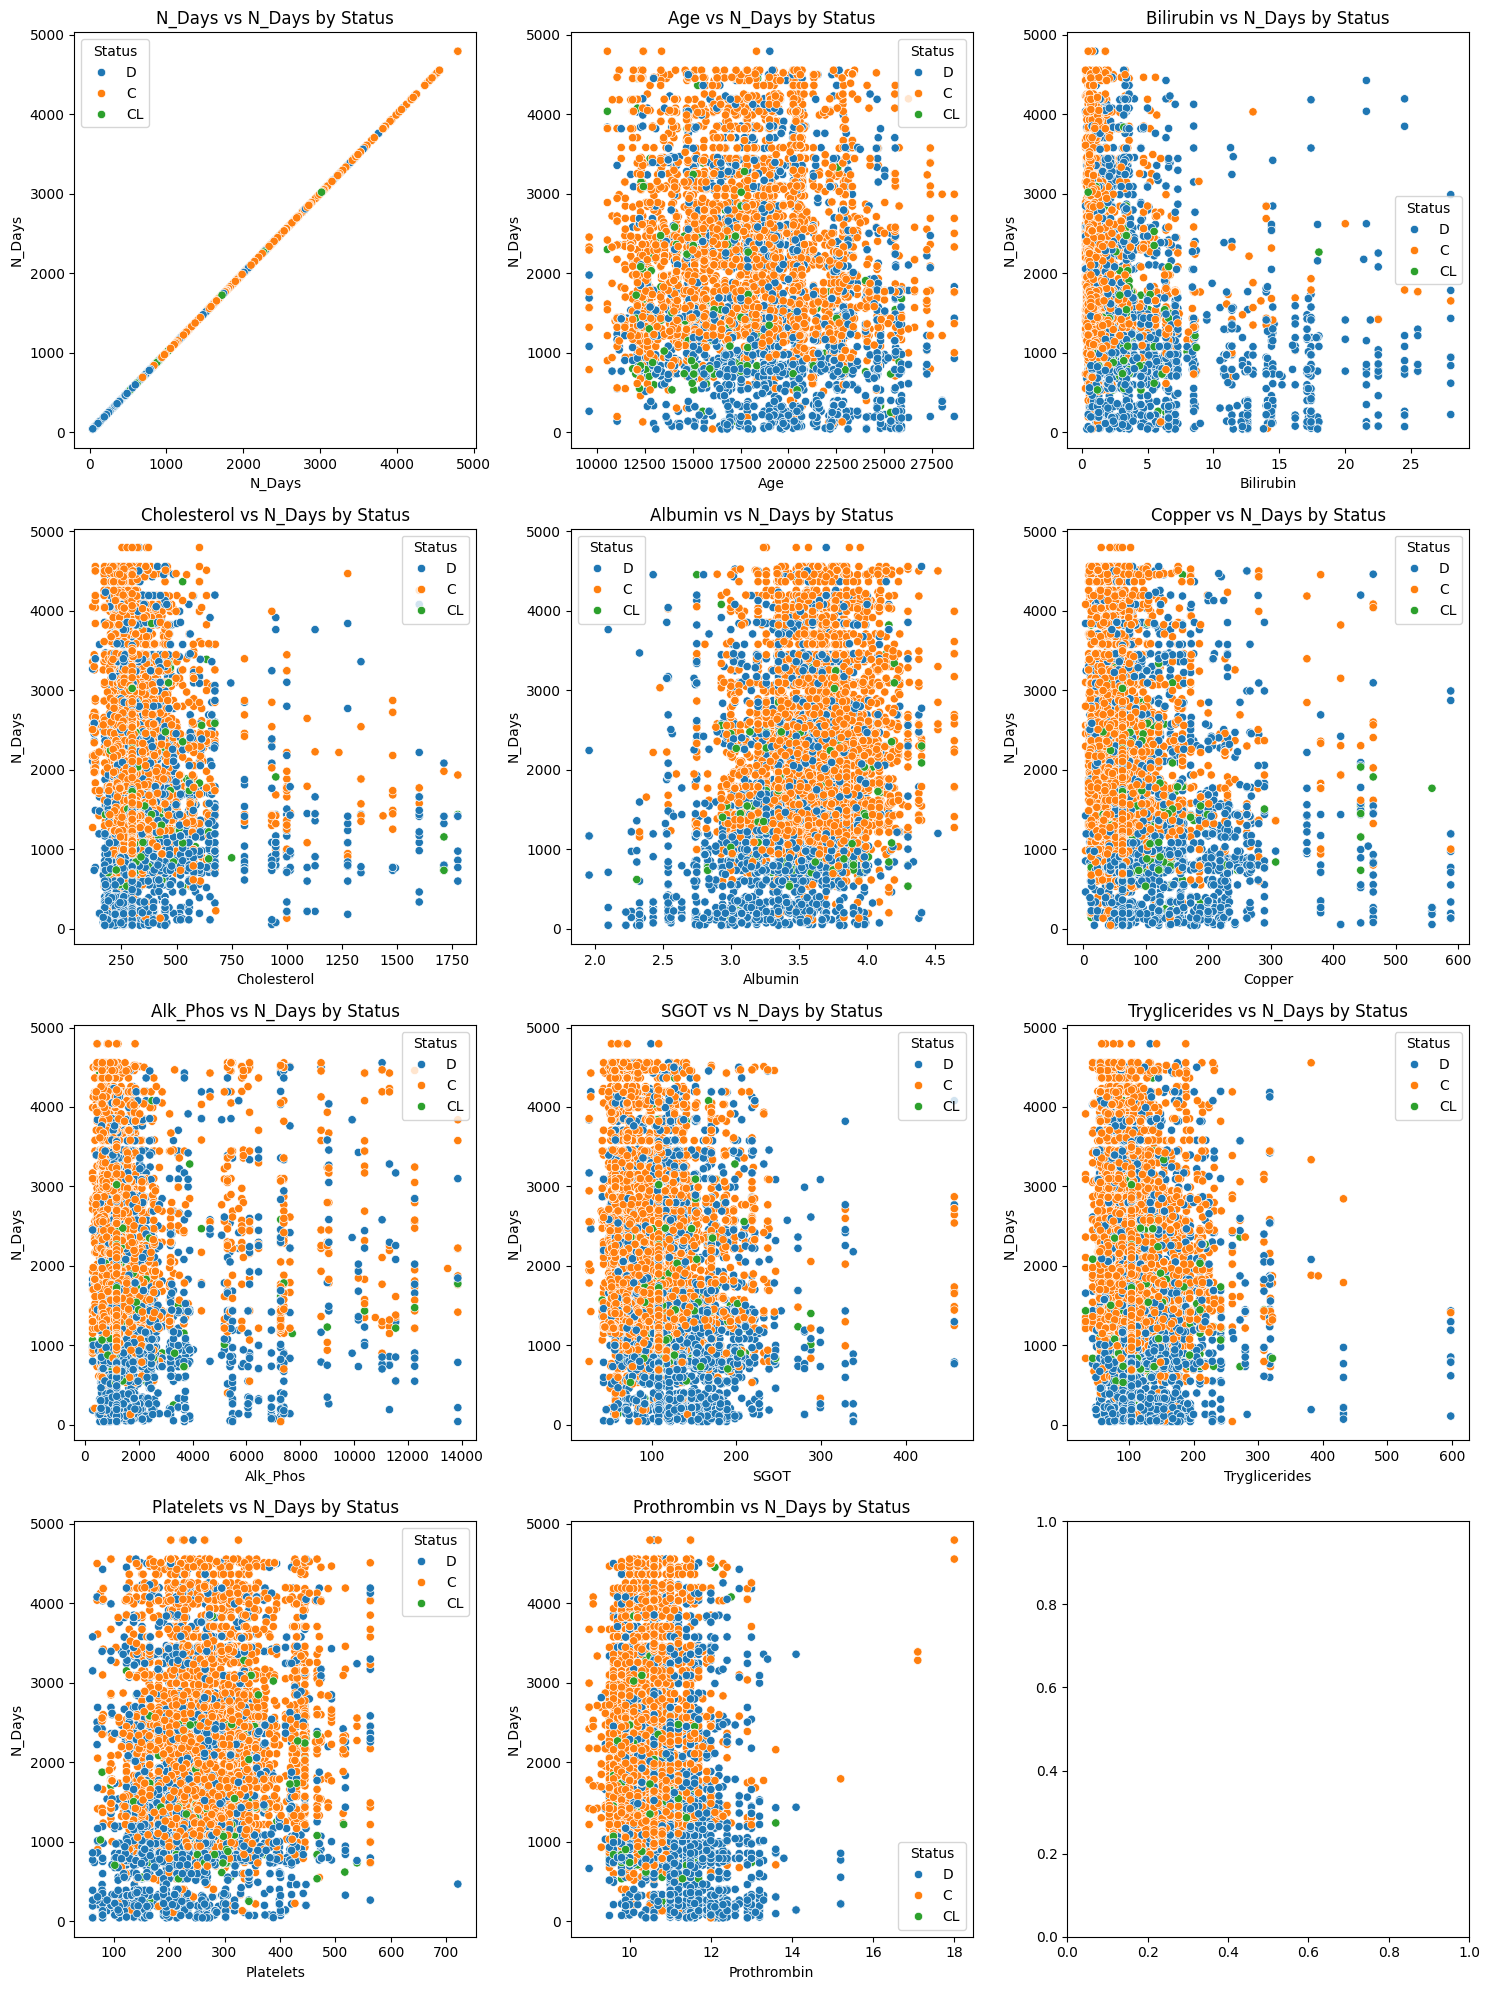

In [ ]:
fig, axes = plt.subplots(nrows=math.ceil(len(num_cols)/3), ncols=3, figsize=(15,20))
axes = axes.flatten()
for idx, col in enumerate(num_cols):
    sns.scatterplot(data=df, x=col, y='N_Days', hue='Status', ax=axes[idx])
    axes[idx].set_title(f"{col} vs N_Days by Status")

plt.tight_layout()

All the plots show that is no correlation with N_Days

### 3.2.3 Multi-variate Analysis

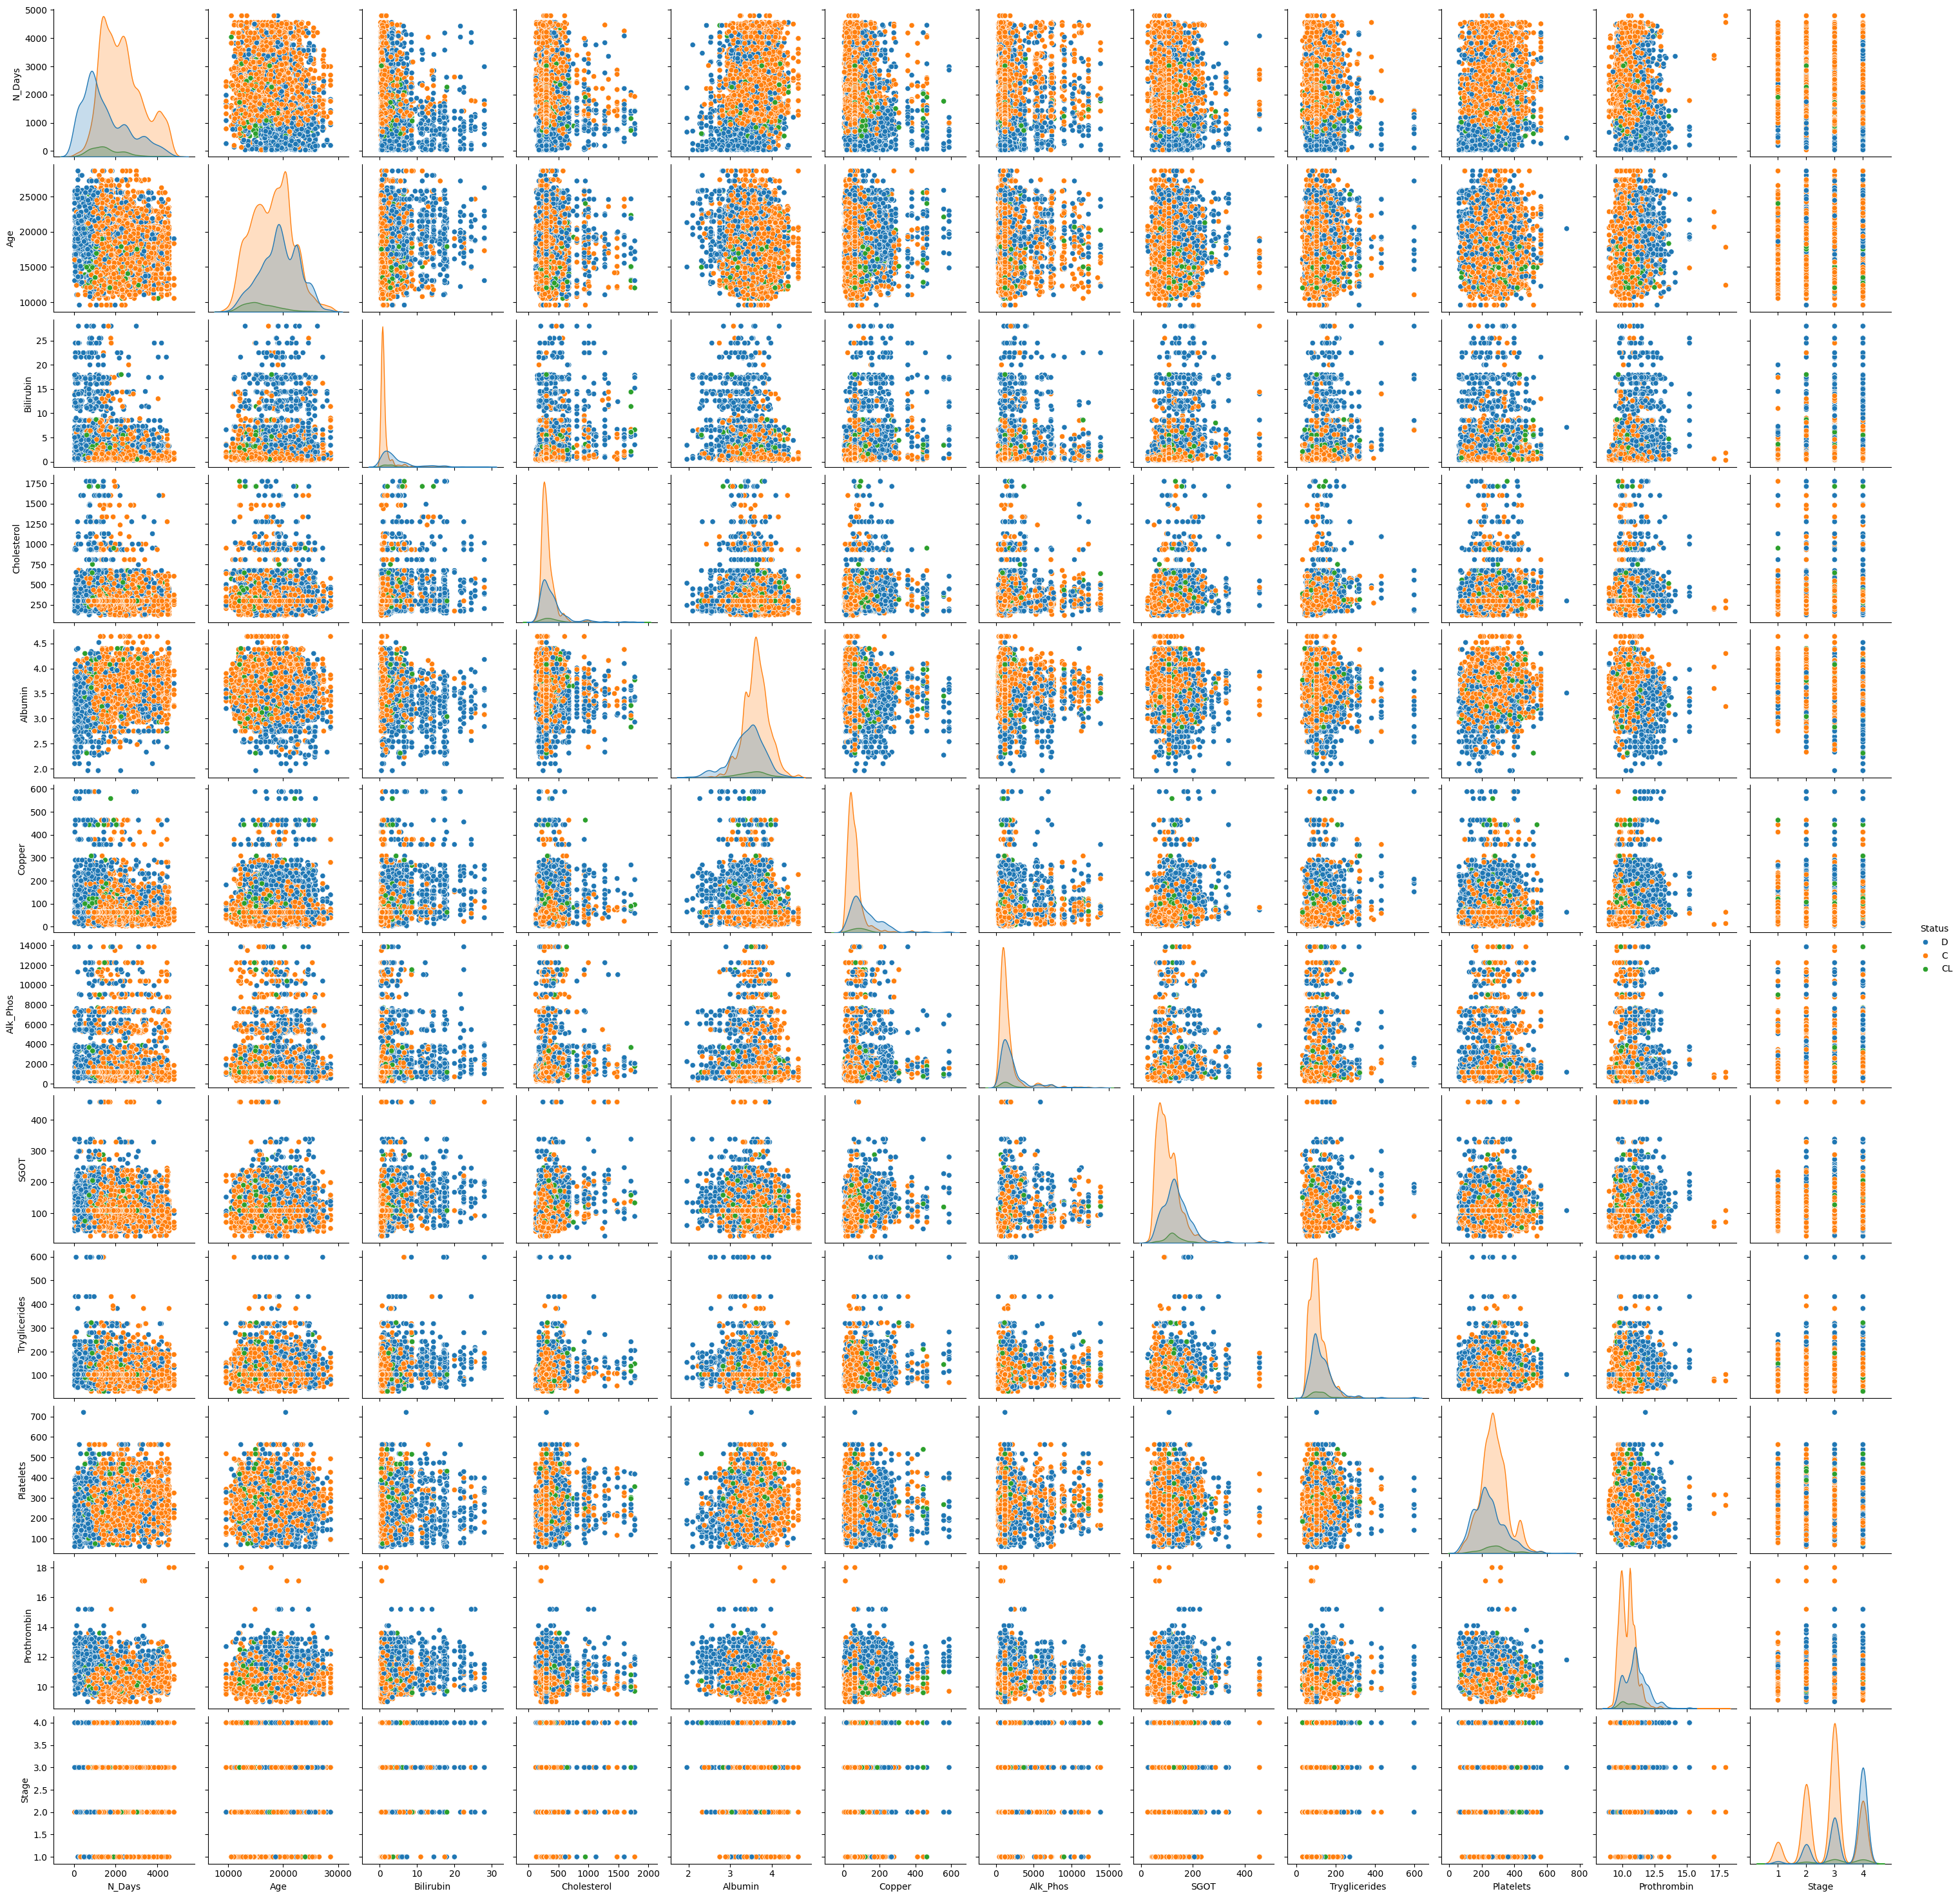

In [ ]:
sns.pairplot(data=df, hue='Status');

Text(0.5, 0.95, 'Variable Correlations')

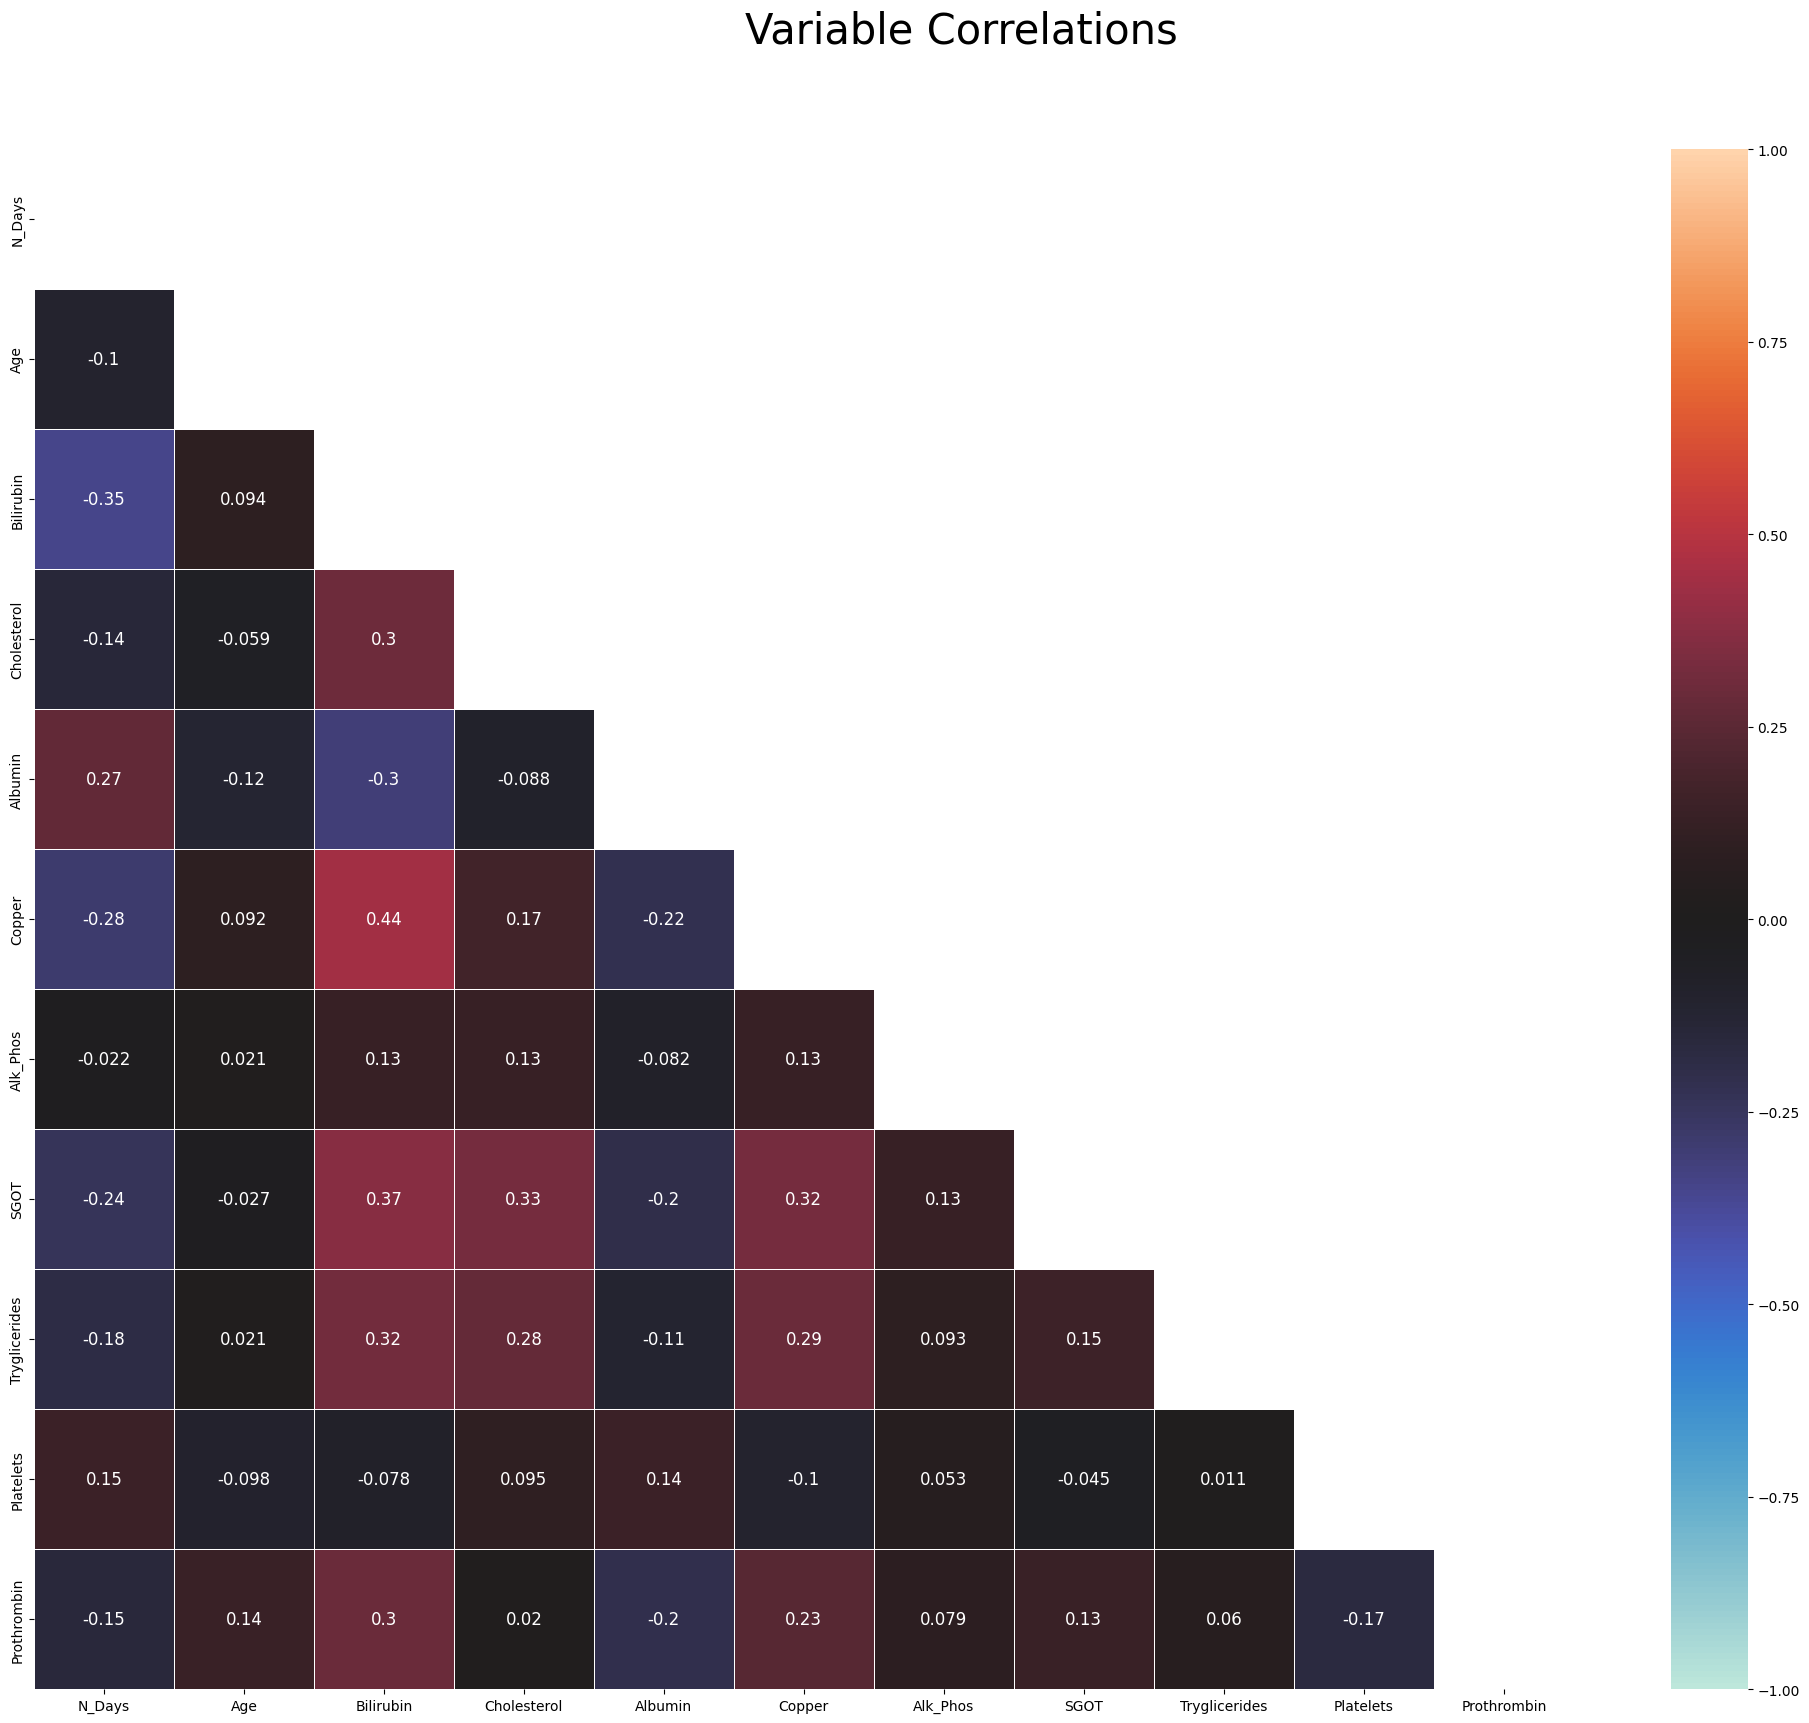

In [ ]:
# calculating correlation

correlation = df[num_cols].corr()

mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize= (25,20))

sns.heatmap(
    data = correlation,
    mask = mask,
    square = True,
    annot = True,
    vmin=-1,
    center = 0,
    vmax=1,
    linewidths = 0.5,
    annot_kws={"size": 12}
)

fig.suptitle('Variable Correlations', fontsize=30, y=.95)

## 3.3 Feature Engineering

In [ ]:
df.head()

N_Days             Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
0     999  D-penicillamine  21532   M       N            N       N     N   
1    2574          Placebo  19237   F       N            N       N     N   
2    3428          Placebo  13727   F       N            Y       Y     Y   
3    2576          Placebo  18460   F       N            N       N     N   
4     788          Placebo  16658   F       N            Y       N     N   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0        2.3        316.0     3.35   172.0    1601.0  179.80           63.0   
1        0.9        364.0     3.54    63.0    1440.0  134.85           88.0   
2        3.3        299.0     3.55   131.0    1029.0  119.35           50.0   
3        0.6        256.0     3.50    58.0    1653.0   71.30           96.0   
4        1.1        346.0     3.65    63.0    1181.0  125.55           96.0   

   Platelets  Prothrombin Stage Status  
0      394.0          9.7   3.0      D  
1      361.0         11.0   3.0      C  
2      199.0         11.7   4.0      D  
3      269.0         10.7   3.0      C  
4      298.0         10.6   4.0      C

In [ ]:
df.columns

Index(['N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders',
       'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos',
       'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Status'],
      dtype='object')

In [ ]:
lab_numbers = ['Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

Based on [Mayo Clinic](https://www.mayoclinic.org/tests-procedures/liver-function-tests/about/pac-20394595), the standard range blood test results for typical liver function tests include:

- ALT. 7 to 55 units per liter (U/L).
- AST. 8 to 48 U/L.
- ALP. 40 to 129 U/L.
- Albumin. 3.5 to 5.0 grams per deciliter (g/dL).
- Total protein. 6.3 to 7.9 g/dL.
- Bilirubin. 0.1 to 1.2 milligrams per deciliter (mg/dL).
- GGT. 8 to 61 U/L.
- LD. 122 to 222 U/L.
- PT. 9.4 to 12.5 seconds.

New columns will be created to show whether the patients numbers are within the normal range or out of it.

In [ ]:
normal_ranges = {
    'Bilirubin': (0.1, 1.2),
    'Cholesterol': (125, 200),
    'Albumin': (3.4, 5.4),
    'Copper': (10, 30),
    'Alk_Phos': (40, 129),
    'SGOT': (8, 45),
    'Tryglicerides': (48.68, 168.15),
    'Platelets': (150, 400),
    'Prothrombin': (11,13.5)
}

In [ ]:
# Create new columns
for col, (low, high) in normal_ranges.items():
    df[f'{col}_Status'] = df[col].apply(lambda x: 'Within' if low <= x <= high else 'Out')


In [ ]:
df.head()

N_Days             Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
0     999  D-penicillamine  21532   M       N            N       N     N   
1    2574          Placebo  19237   F       N            N       N     N   
2    3428          Placebo  13727   F       N            Y       Y     Y   
3    2576          Placebo  18460   F       N            N       N     N   
4     788          Placebo  16658   F       N            Y       N     N   

   Bilirubin  Cholesterol  ...  Status  Bilirubin_Status  Cholesterol_Status  \
0        2.3        316.0  ...       D               Out                 Out   
1        0.9        364.0  ...       C            Within                 Out   
2        3.3        299.0  ...       D               Out                 Out   
3        0.6        256.0  ...       C            Within                 Out   
4        1.1        346.0  ...       C            Within                 Out   

   Albumin_Status  Copper_Status  Alk_Phos_Status  SGOT_Status  \
0             Out            Out              Out          Out   
1          Within            Out              Out          Out   
2          Within            Out              Out          Out   
3          Within            Out              Out          Out   
4          Within            Out              Out          Out   

  Tryglicerides_Status Platelets_Status Prothrombin_Status  
0               Within           Within                Out  
1               Within           Within             Within  
2               Within           Within             Within  
3               Within           Within                Out  
4               Within           Within                Out  

[5 rows x 28 columns]

A new column will also be created showing the different age classes


In [ ]:
df['age_years'] = df['Age'].apply(lambda x: math.floor(x/365.25))
df.head()

N_Days             Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
0     999  D-penicillamine  21532   M       N            N       N     N   
1    2574          Placebo  19237   F       N            N       N     N   
2    3428          Placebo  13727   F       N            Y       Y     Y   
3    2576          Placebo  18460   F       N            N       N     N   
4     788          Placebo  16658   F       N            Y       N     N   

   Bilirubin  Cholesterol  ...  Bilirubin_Status  Cholesterol_Status  \
0        2.3        316.0  ...               Out                 Out   
1        0.9        364.0  ...            Within                 Out   
2        3.3        299.0  ...               Out                 Out   
3        0.6        256.0  ...            Within                 Out   
4        1.1        346.0  ...            Within                 Out   

   Albumin_Status  Copper_Status  Alk_Phos_Status  SGOT_Status  \
0             Out            Out              Out          Out   
1          Within            Out              Out          Out   
2          Within            Out              Out          Out   
3          Within            Out              Out          Out   
4          Within            Out              Out          Out   

   Tryglicerides_Status Platelets_Status Prothrombin_Status age_years  
0                Within           Within                Out        58  
1                Within           Within             Within        52  
2                Within           Within             Within        37  
3                Within           Within                Out        50  
4                Within           Within                Out        45  

[5 rows x 29 columns]

In [ ]:
bins = [0, 30, 40, 50, 60, float('inf')]
labels = ['Very Young (≤30)', 'Young Adults (31-40)', 'Middle-aged (41-50)',
          'Older Adults (51-60)', 'Elderly (>60)']

df['Age_Group'] = pd.cut(df['age_years'], bins=bins, labels=labels, right=True)


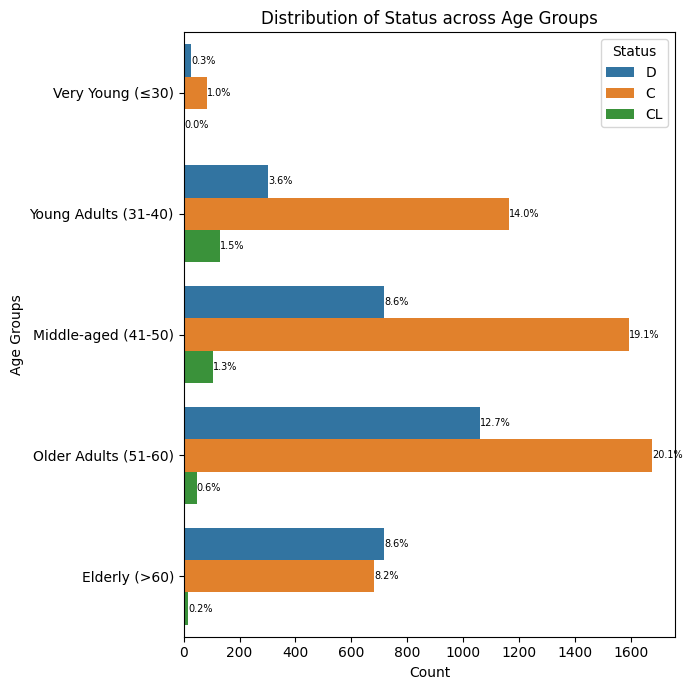

In [ ]:
plt.figure(figsize=(7, 7))
ax = sns.countplot(y='Age_Group', hue='Status', data=df)
plt.title('Distribution of Status across Age Groups')
plt.xlabel('Count')
plt.ylabel('Age Groups')


total = len(df)  # Total number of observations


for p in ax.patches:
    height=p.get_height()
    if height > 0:
        percentage = f"{round((p.get_width() / total) * 100, 1)}%"  # Adjust for horizontal bars
        x_position = min(p.get_width(), ax.get_xlim()[1] - 10)
        ax.annotate(
            text=percentage,
            xy=(p.get_width(), p.get_y() + p.get_height() / 2),  # Adjusted for horizontal bars
            ha='left',  # Align text to the left of the bars
            va='center',
            fontsize=7,
            color='black',
            xytext=(0, 0),  # Offset slightly to the right
            textcoords='offset points'
        )
# plt.xlim()
plt.tight_layout()
plt.show()


- Most of the people who died were between the ages of 51 and 60, while the least were young people who were less than 30 years old.

In [ ]:
processed_path = r"C:\Users\njamb\Desktop\DataScience\CirrhosisPatientSurvivalPrediction\data\processed\clean.csv"

df.to_csv(path_or_buf=processed_path)

In [ ]:
num_cols

['N_Days',
 'Age',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin']

In [ ]:
# removing outliers
for col in num_cols:
    df[col] = winsorize(a=df[col], limits=[0.05, 0.05])

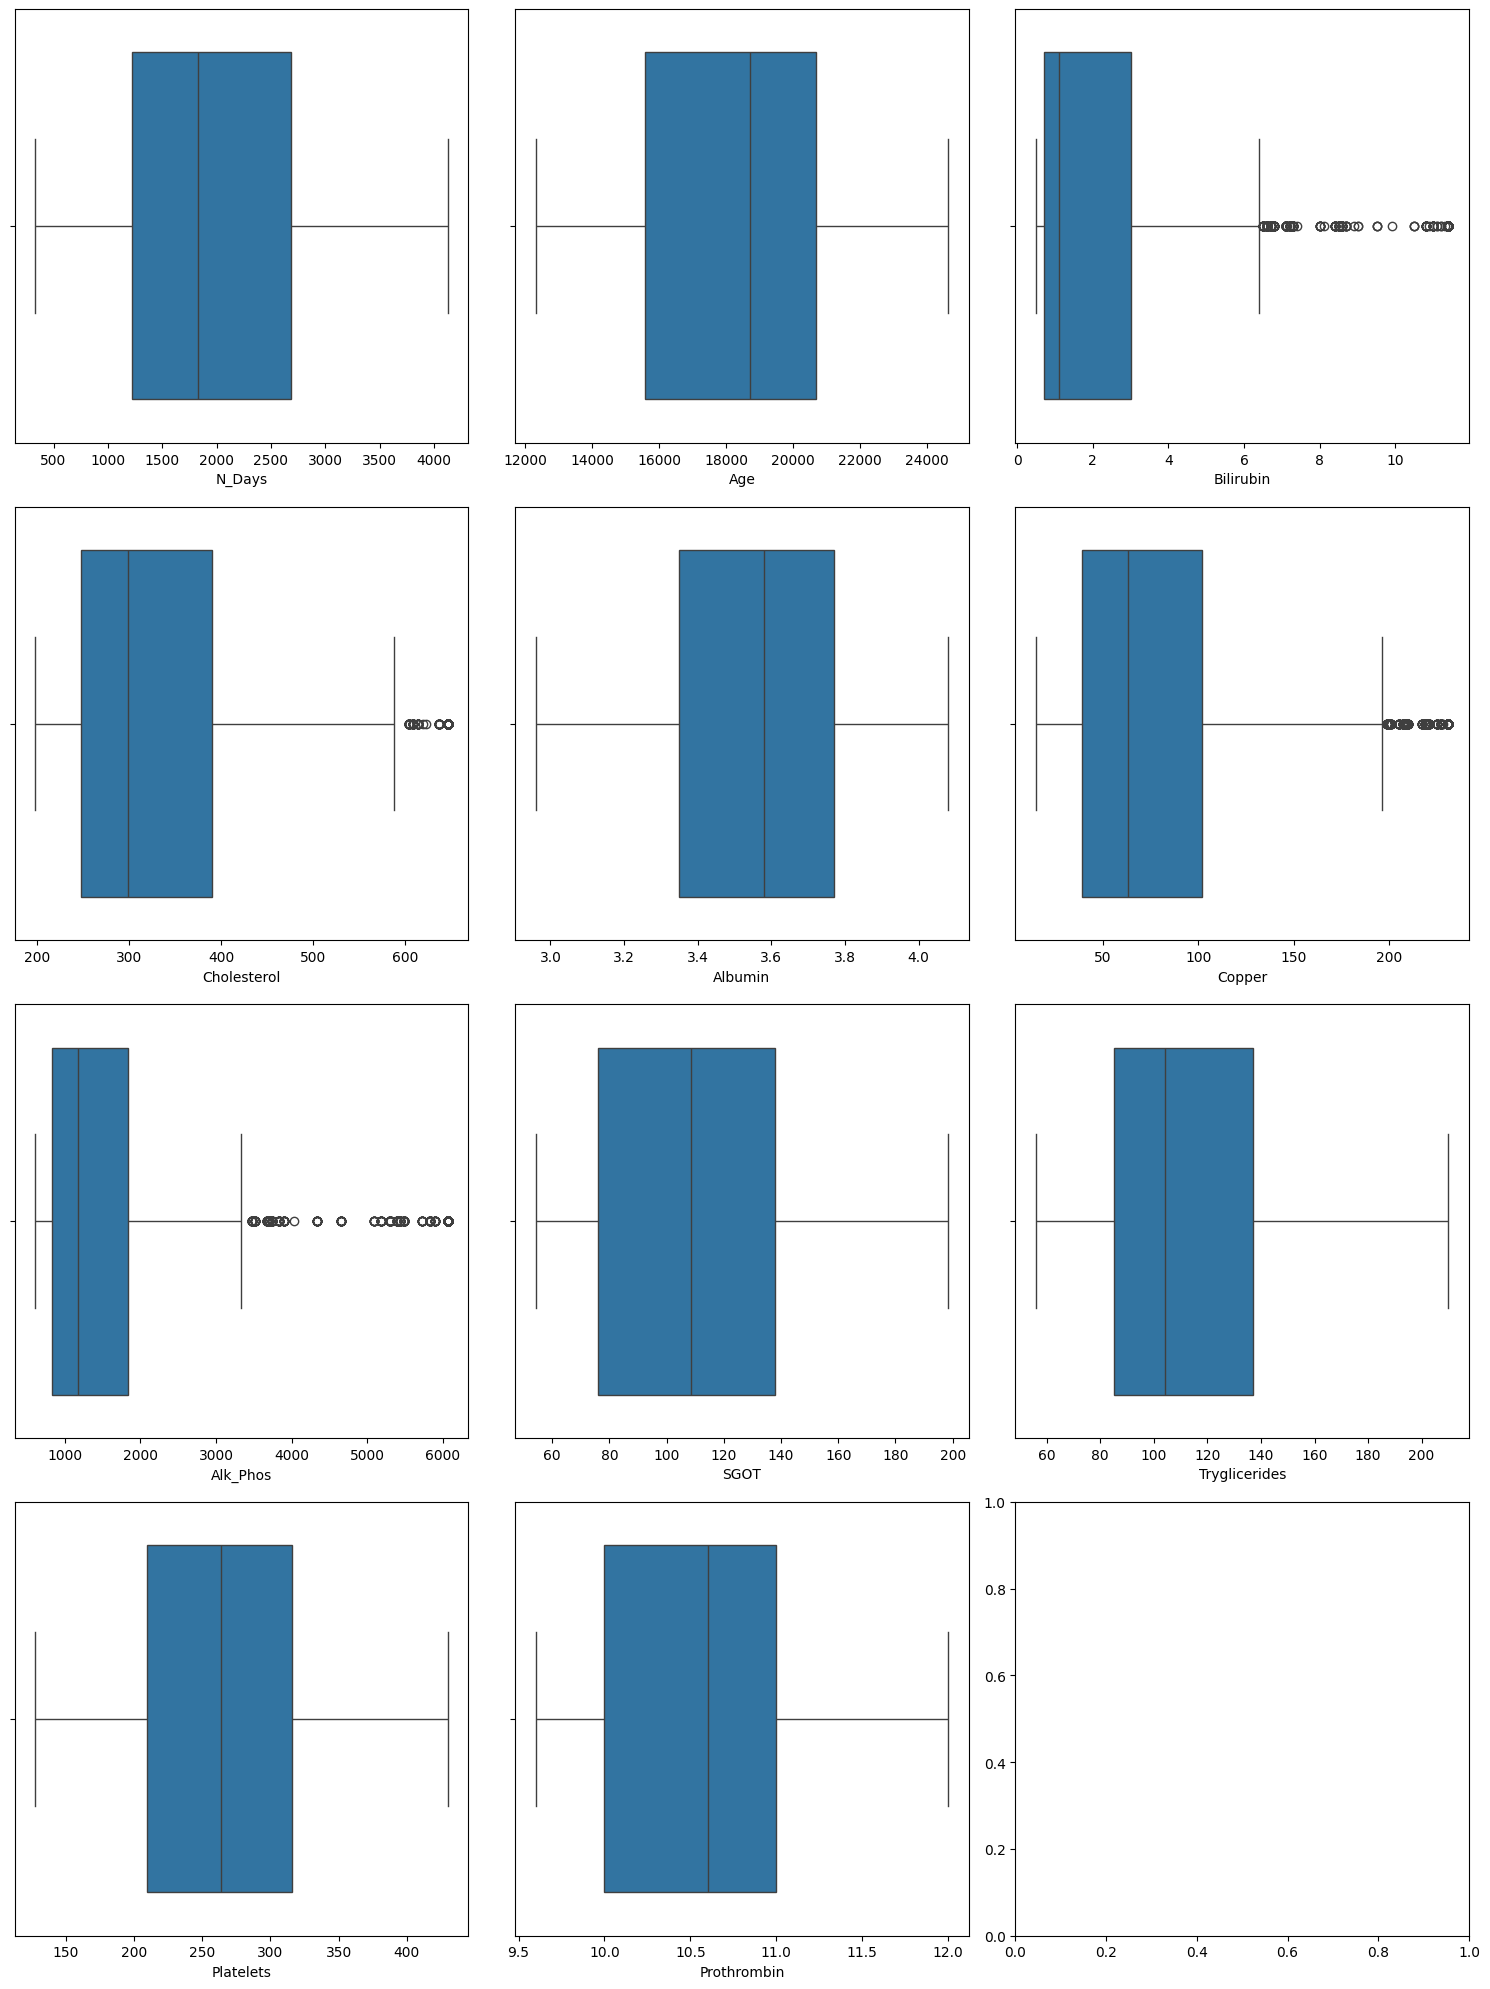

In [ ]:
fig, axes = plt.subplots(nrows=math.ceil(len(num_cols)/3), ncols=3, figsize=(15,20))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(data=df, x=col, ax=axes[i])

plt.tight_layout()

# 4. Modelling

## 4.1 Preprocessing

The column `ID` can be dropped as it is a unique identifier.
The column `Age`can be dropped as a new column has been created of age in years

In [ ]:
df.drop(columns=['Age'], inplace=True)

In [ ]:
df.head()

N_Days             Drug Sex Ascites Hepatomegaly Spiders Edema  Bilirubin  \
0     999  D-penicillamine   M       N            N       N     N        2.3   
1    2574          Placebo   F       N            N       N     N        0.9   
2    3428          Placebo   F       N            Y       Y     Y        3.3   
3    2576          Placebo   F       N            N       N     N        0.6   
4     788          Placebo   F       N            Y       N     N        1.1   

   Cholesterol  Albumin  ...  Cholesterol_Status  Albumin_Status  \
0        316.0     3.35  ...                 Out             Out   
1        364.0     3.54  ...                 Out          Within   
2        299.0     3.55  ...                 Out          Within   
3        256.0     3.50  ...                 Out          Within   
4        346.0     3.65  ...                 Out          Within   

   Copper_Status  Alk_Phos_Status  SGOT_Status  Tryglicerides_Status  \
0            Out              Out          Out                Within   
1            Out              Out          Out                Within   
2            Out              Out          Out                Within   
3            Out              Out          Out                Within   
4            Out              Out          Out                Within   

  Platelets_Status Prothrombin_Status age_years             Age_Group  
0           Within                Out        58  Older Adults (51-60)  
1           Within             Within        52  Older Adults (51-60)  
2           Within             Within        37  Young Adults (31-40)  
3           Within                Out        50   Middle-aged (41-50)  
4           Within                Out        45   Middle-aged (41-50)  

[5 rows x 29 columns]

In [ ]:
# separating into X and y
X = df.drop(columns='Status')
y= df['Status']

In [ ]:
y.shape, X.shape

((8323,), (8323, 28))

In [ ]:
cat_columns = X.select_dtypes(exclude=np.number).columns.to_list()
cat_columns

['Drug',
 'Sex',
 'Ascites',
 'Hepatomegaly',
 'Spiders',
 'Edema',
 'Stage',
 'Bilirubin_Status',
 'Cholesterol_Status',
 'Albumin_Status',
 'Copper_Status',
 'Alk_Phos_Status',
 'SGOT_Status',
 'Tryglicerides_Status',
 'Platelets_Status',
 'Prothrombin_Status',
 'Age_Group']

In [ ]:
num_columns = X.select_dtypes(include=np.number).columns.to_list()
num_columns

['N_Days',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin',
 'age_years']

In [ ]:
df[cat_columns].head()

Drug Sex Ascites Hepatomegaly Spiders Edema Stage  \
0  D-penicillamine   M       N            N       N     N   3.0   
1          Placebo   F       N            N       N     N   3.0   
2          Placebo   F       N            Y       Y     Y   4.0   
3          Placebo   F       N            N       N     N   3.0   
4          Placebo   F       N            Y       N     N   4.0   

  Bilirubin_Status Cholesterol_Status Albumin_Status Copper_Status  \
0              Out                Out            Out           Out   
1           Within                Out         Within           Out   
2              Out                Out         Within           Out   
3           Within                Out         Within           Out   
4           Within                Out         Within           Out   

  Alk_Phos_Status SGOT_Status Tryglicerides_Status Platelets_Status  \
0             Out         Out               Within           Within   
1             Out         Out               Within           Within   
2             Out         Out               Within           Within   
3             Out         Out               Within           Within   
4             Out         Out               Within           Within   

  Prothrombin_Status             Age_Group  
0                Out  Older Adults (51-60)  
1             Within  Older Adults (51-60)  
2             Within  Young Adults (31-40)  
3                Out   Middle-aged (41-50)  
4                Out   Middle-aged (41-50)

In [ ]:
# splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5826, 28), (2497, 28), (5826,), (2497,))

The column `Stage` has an order. Stage 1 is not as bad as stage 4, hence Ordinal encoding will be used

### 4.1.1 Training Data

In [ ]:
X_train.head()

N_Days             Drug Sex Ascites Hepatomegaly Spiders Edema  \
4038    1455  D-penicillamine   F       N            Y       N     N   
1735    2452  D-penicillamine   F       N            N       N     N   
3746    4127          Placebo   F       N            Y       N     N   
3366    1434  D-penicillamine   F       N            N       N     N   
4590    1932          Placebo   F       N            Y       Y     N   

      Bilirubin  Cholesterol  Albumin  ...  Cholesterol_Status  \
4038        4.5        636.0     3.76  ...                 Out   
1735        0.7        257.0     3.43  ...                 Out   
3746        0.7        298.0     4.08  ...                 Out   
3366        0.6        248.0     3.77  ...                 Out   
4590       11.4        646.0     3.43  ...                 Out   

      Albumin_Status  Copper_Status  Alk_Phos_Status  SGOT_Status  \
4038          Within            Out              Out          Out   
1735          Within            Out              Out          Out   
3746          Within            Out              Out          Out   
3366          Within            Out              Out          Out   
4590          Within            Out              Out          Out   

      Tryglicerides_Status Platelets_Status Prothrombin_Status age_years  \
4038                Within           Within             Within        52   
1735                Within           Within                Out        36   
3746                Within           Within                Out        45   
3366                Within           Within             Within        38   
4590                Within              Out             Within        44   

                 Age_Group  
4038  Older Adults (51-60)  
1735  Young Adults (31-40)  
3746   Middle-aged (41-50)  
3366  Young Adults (31-40)  
4590   Middle-aged (41-50)  

[5 rows x 28 columns]

In [ ]:
order = [[1.0, 2.0, 3.0, 4.0]]
ord_enc = OrdinalEncoder(categories=order)

In [ ]:
X_train['Stage'] = ord_enc.fit_transform(X_train[['Stage']])
X_train

N_Days             Drug Sex Ascites Hepatomegaly Spiders Edema  \
4038    1455  D-penicillamine   F       N            Y       N     N   
1735    2452  D-penicillamine   F       N            N       N     N   
3746    4127          Placebo   F       N            Y       N     N   
3366    1434  D-penicillamine   F       N            N       N     N   
4590    1932          Placebo   F       N            Y       Y     N   
...      ...              ...  ..     ...          ...     ...   ...   
5828    1030          Placebo   F       N            N       N     N   
136     2990  D-penicillamine   F       N            N       N     N   
7392    2443  D-penicillamine   F       N            Y       Y     N   
240      769  D-penicillamine   F       N            Y       Y     N   
76      3092          Placebo   M       N            N       N     N   

      Bilirubin  Cholesterol  Albumin  ...  Cholesterol_Status  \
4038        4.5        636.0     3.76  ...                 Out   
1735        0.7        257.0     3.43  ...                 Out   
3746        0.7        298.0     4.08  ...                 Out   
3366        0.6        248.0     3.77  ...                 Out   
4590       11.4        646.0     3.43  ...                 Out   
...         ...          ...      ...  ...                 ...   
5828        0.5        412.0     3.95  ...                 Out   
136         1.1        399.0     3.60  ...                 Out   
7392        1.1        392.0     3.55  ...                 Out   
240        11.4        448.0     3.43  ...                 Out   
76          0.8        216.0     2.96  ...                 Out   

      Albumin_Status  Copper_Status  Alk_Phos_Status  SGOT_Status  \
4038          Within            Out              Out          Out   
1735          Within            Out              Out          Out   
3746          Within            Out              Out          Out   
3366          Within            Out              Out          Out   
4590          Within            Out              Out          Out   
...              ...            ...              ...          ...   
5828          Within            Out              Out          Out   
136           Within            Out              Out          Out   
7392          Within            Out              Out          Out   
240           Within            Out              Out          Out   
76               Out         Within              Out          Out   

      Tryglicerides_Status  Platelets_Status Prothrombin_Status age_years  \
4038                Within            Within             Within        52   
1735                Within            Within                Out        36   
3746                Within            Within                Out        45   
3366                Within            Within             Within        38   
4590                Within               Out             Within        44   
...                    ...               ...                ...       ...   
5828                Within               Out                Out        62   
136                 Within            Within                Out        62   
7392                   Out            Within                Out        59   
240                 Within            Within             Within        52   
76                  Within            Within             Within        43   

                 Age_Group  
4038  Older Adults (51-60)  
1735  Young Adults (31-40)  
3746   Middle-aged (41-50)  
3366  Young Adults (31-40)  
4590   Middle-aged (41-50)  
...                    ...  
5828         Elderly (>60)  
136          Elderly (>60)  
7392  Older Adults (51-60)  
240   Older Adults (51-60)  
76     Middle-aged (41-50)  

[5826 rows x 28 columns]

In [ ]:
ohe_columns = cat_columns.copy()
ohe_columns.remove('Stage')

In [ ]:
len(ohe_columns)

16

In [ ]:
X_train[ohe_columns].nunique().sum()

35

In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')

In [ ]:
ohe_transform_X_train = ohe.fit_transform(X_train[ohe_columns])
ohe_transform_X_train

Drug_D-penicillamine  Drug_Placebo  Sex_F  Sex_M  Ascites_N  Ascites_Y  \
4038                   1.0           0.0    1.0    0.0        1.0        0.0   
1735                   1.0           0.0    1.0    0.0        1.0        0.0   
3746                   0.0           1.0    1.0    0.0        1.0        0.0   
3366                   1.0           0.0    1.0    0.0        1.0        0.0   
4590                   0.0           1.0    1.0    0.0        1.0        0.0   
...                    ...           ...    ...    ...        ...        ...   
5828                   0.0           1.0    1.0    0.0        1.0        0.0   
136                    1.0           0.0    1.0    0.0        1.0        0.0   
7392                   1.0           0.0    1.0    0.0        1.0        0.0   
240                    1.0           0.0    1.0    0.0        1.0        0.0   
76                     0.0           1.0    0.0    1.0        1.0        0.0   

      Hepatomegaly_N  Hepatomegaly_Y  Spiders_N  Spiders_Y  ...  \
4038             0.0             1.0        1.0        0.0  ...   
1735             1.0             0.0        1.0        0.0  ...   
3746             0.0             1.0        1.0        0.0  ...   
3366             1.0             0.0        1.0        0.0  ...   
4590             0.0             1.0        0.0        1.0  ...   
...              ...             ...        ...        ...  ...   
5828             1.0             0.0        1.0        0.0  ...   
136              1.0             0.0        1.0        0.0  ...   
7392             0.0             1.0        0.0        1.0  ...   
240              0.0             1.0        0.0        1.0  ...   
76               1.0             0.0        1.0        0.0  ...   

      Tryglicerides_Status_Within  Platelets_Status_Out  \
4038                          1.0                   0.0   
1735                          1.0                   0.0   
3746                          1.0                   0.0   
3366                          1.0                   0.0   
4590                          1.0                   1.0   
...                           ...                   ...   
5828                          1.0                   1.0   
136                           1.0                   0.0   
7392                          0.0                   0.0   
240                           1.0                   0.0   
76                            1.0                   0.0   

      Platelets_Status_Within  Prothrombin_Status_Out  \
4038                      1.0                     0.0   
1735                      1.0                     1.0   
3746                      1.0                     1.0   
3366                      1.0                     0.0   
4590                      0.0                     0.0   
...                       ...                     ...   
5828                      0.0                     1.0   
136                       1.0                     1.0   
7392                      1.0                     1.0   
240                       1.0                     0.0   
76                        1.0                     0.0   

      Prothrombin_Status_Within  Age_Group_Elderly (>60)  \
4038                        1.0                      0.0   
1735                        0.0                      0.0   
3746                        0.0                      0.0   
3366                        1.0                      0.0   
4590                        1.0                      0.0   
...                         ...                      ...   
5828                        0.0                      1.0   
136                         0.0                      1.0   
7392                        0.0                      0.0   
240                         1.0                      0.0   
76                          1.0                      0.0   

      Age_Group_Middle-aged (41-50)  Age_Group_Older Adults (51-60)  \
4038                            0.0                   

In [ ]:
len(num_columns)

11

In [ ]:
scaler = StandardScaler()

In [ ]:
num_X_train_scaled = scaler.fit_transform(X_train[num_columns])
num_X_train_scaled_df = pd.DataFrame(num_X_train_scaled, columns=X_train[num_columns].columns, index=X_train.index)
num_X_train_scaled_df

N_Days  Bilirubin  Cholesterol   Albumin    Copper  Alk_Phos  \
4038 -0.537252   0.787552     2.572916  0.691420  2.581767  0.459291   
1735  0.404824  -0.595358    -0.641124 -0.417438 -0.472457  0.361574   
3746  1.987549  -0.595358    -0.293431  1.766677 -0.681890 -0.743213   
3366 -0.557095  -0.631750    -0.717447  0.725022 -0.280478 -0.723523   
4590 -0.086529   3.298624     2.657719 -0.417438  2.197807  0.280629   
...        ...        ...          ...       ...       ...       ...   
5828 -0.938838  -0.668143     0.673325  1.329854 -0.210667 -0.282338   
136   0.913186  -0.449789     0.563081  0.153792 -0.001234  1.306658   
7392  0.396320  -0.449789     0.503719 -0.014217 -0.716795 -0.392452   
240  -1.185460   3.298624     0.978616 -0.417438  0.557253 -0.107322   
76    1.009567  -0.558966    -0.988817 -1.996722 -1.118208 -0.733733   

          SGOT  Tryglicerides  Platelets  Prothrombin  age_years  
4038 -0.493795       0.041615  -0.630353     2.070599   0.228181  
1735 -0.393922      -1.371246   0.382058    -0.285631  -1.341804  
3746 -0.129624      -1.127649   0.740106     0.008898  -0.458687  
3366 -1.224574      -0.153262  -0.408116     0.892484  -1.145556  
4590  1.305138      -0.616096   1.913021     1.334277  -0.556811  
...        ...            ...        ...          ...        ...  
5828  0.625514      -0.616096   1.950060    -0.727424   1.209422  
136   1.040839       0.967283   0.987036    -0.727424   1.209422  
7392 -0.129624       1.990390  -0.198226    -0.727424   0.915050  
240   0.529295       1.040362  -0.383423     0.597955   0.228181  
76   -1.029699      -0.494297   0.987036     0.597955  -0.654935  

[5826 rows x 11 columns]

In [ ]:
X_train_final = pd.concat([X_train[['Stage']], ohe_transform_X_train, num_X_train_scaled_df], axis=1)
X_train_final.head()

Stage  Drug_D-penicillamine  Drug_Placebo  Sex_F  Sex_M  Ascites_N  \
4038    2.0                   1.0           0.0    1.0    0.0        1.0   
1735    0.0                   1.0           0.0    1.0    0.0        1.0   
3746    1.0                   0.0           1.0    1.0    0.0        1.0   
3366    2.0                   1.0           0.0    1.0    0.0        1.0   
4590    3.0                   0.0           1.0    1.0    0.0        1.0   

      Ascites_Y  Hepatomegaly_N  Hepatomegaly_Y  Spiders_N  ...  Bilirubin  \
4038        0.0             0.0             1.0        1.0  ...   0.787552   
1735        0.0             1.0             0.0        1.0  ...  -0.595358   
3746        0.0             0.0             1.0        1.0  ...  -0.595358   
3366        0.0             1.0             0.0        1.0  ...  -0.631750   
4590        0.0             0.0             1.0        0.0  ...   3.298624   

      Cholesterol   Albumin    Copper  Alk_Phos      SGOT  Tryglicerides  \
4038     2.572916  0.691420  2.581767  0.459291 -0.493795       0.041615   
1735    -0.641124 -0.417438 -0.472457  0.361574 -0.393922      -1.371246   
3746    -0.293431  1.766677 -0.681890 -0.743213 -0.129624      -1.127649   
3366    -0.717447  0.725022 -0.280478 -0.723523 -1.224574      -0.153262   
4590     2.657719 -0.417438  2.197807  0.280629  1.305138      -0.616096   

      Platelets  Prothrombin  age_years  
4038  -0.630353     2.070599   0.228181  
1735   0.382058    -0.285631  -1.341804  
3746   0.740106     0.008898  -0.458687  
3366  -0.408116     0.892484  -1.145556  
4590   1.913021     1.334277  -0.556811  

[5 rows x 47 columns]

In [ ]:
y_train.unique()

array(['C', 'D', 'CL'], dtype=object)

In [ ]:
# encode y_train

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

### 4.1.2 Testing Data

In [ ]:
# transform stage column
X_test['Stage'] = ord_enc.transform(X_test[['Stage']])
# ohe categorical columns
ohe_transform_X_test = ohe.transform(X_test[ohe_columns])
# scale numerical columns
num_X_test_scaled = scaler.transform(X_test[num_columns])
num_X_test_scaled_df = pd.DataFrame(num_X_test_scaled, columns=X_test[num_columns].columns, index=X_test.index)
X_test_final = pd.concat([X_test[['Stage']], ohe_transform_X_test, num_X_test_scaled_df], axis=1)
# encode y_test
y_test_encoded = le.transform(y_test)



## 4.2 Modelling

In [ ]:
param_grids = {
    "Support Vector Machine": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf", "poly"]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10]
    },
    "Gradient Boosting": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 10]
    },
    "XGBoost": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 10]
    },
    "CatBoost": {
        "iterations": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.2],
        "depth": [3, 5, 10]
    }
}

In [ ]:
# Function to train models using GridSearchCV
def train_with_gridsearch(X_train, X_test, y_train, y_test):
    models = {
        "Support Vector Machine": SVC(probability=True, random_state=42),
        "Random Forest": RandomForestClassifier(random_state=42),
        "Gradient Boosting": GradientBoostingClassifier(random_state=42),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
    }

    results = []

    for name, model in models.items():
        print(f"🔍 Tuning {name}...")

        grid_search = GridSearchCV(model, param_grids[name], cv=3, scoring="f1_weighted", n_jobs=-1)
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)

        # Compute evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        results.append({
            "Model": name,
            "Best Params": grid_search.best_params_,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1
        })

    return results


In [ ]:
# Run the models and get results
results = train_with_gridsearch(X_train_final, X_test_final, y_train_encoded, y_test_encoded)

🔍 Tuning Support Vector Machine...


c:\Users\njamb\Desktop\DataScience\CirrhosisPatientSurvivalPrediction\cirrhosisPred\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


🔍 Tuning Random Forest...
🔍 Tuning Gradient Boosting...


KeyboardInterrupt: 

In [ ]:
results

[{'Model': 'Support Vector Machine',
  'Best Params': {'C': 0.1, 'kernel': 'linear'},
  'Accuracy': 0.8033640368442131,
  'Precision': 0.7725349341387099,
  'Recall': 0.8033640368442131,
  'F1-Score': 0.7871965488044731},
 {'Model': 'Random Forest',
  'Best Params': {'max_depth': None,
   'min_samples_split': 2,
   'n_estimators': 200},
  'Accuracy': 0.828994793752503,
  'Precision': 0.824817180132615,
  'Recall': 0.828994793752503,
  'F1-Score': 0.818420480216823},
 {'Model': 'Gradient Boosting',
  'Best Params': {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100},
  'Accuracy': 0.8334000800961153,
  'Precision': 0.8269347432225639,
  'Recall': 0.8334000800961153,
  'F1-Score': 0.8273770232042484},
 {'Model': 'XGBoost',
  'Best Params': {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200},
  'Accuracy': 0.8350020024028835,
  'Precision': 0.8301192011107145,
  'Recall': 0.8350020024028835,
  'F1-Score': 0.8287223976173068},
 {'Model': 'CatBoost',
  'Best Params': {'depth

In [ ]:
# Display results
results_df = pd.DataFrame(results).sort_values(by="F1-Score", ascending=False)
results_df

Model                                        Best Params  \
3                 XGBoost  {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...   
2       Gradient Boosting  {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...   
1           Random Forest  {'max_depth': None, 'min_samples_split': 2, 'n...   
4                CatBoost  {'depth': 3, 'iterations': 200, 'learning_rate...   
0  Support Vector Machine                     {'C': 0.1, 'kernel': 'linear'}   

   Accuracy  Precision    Recall  F1-Score  
3  0.835002   0.830119  0.835002  0.828722  
2  0.833400   0.826935  0.833400  0.827377  
1  0.828995   0.824817  0.828995  0.818420  
4  0.824590   0.815824  0.824590  0.812722  
0  0.803364   0.772535  0.803364  0.787197

In [ ]:
results_df.loc[3, 'Best Params']

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}

In [ ]:
baseline = XGBClassifier(learning_rate=0.2, max_depth=3, n_estimators=200, use_label_encoder=False, eval_metric='logloss', random_state=42)

In [ ]:
baseline.fit(X_train_final, y_train_encoded)

c:\Users\njamb\Desktop\DataScience\CirrhosisPatientSurvivalPrediction\cirrhosisPred\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:28:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# predictions
y_train_pred = baseline.predict(X_train_final)
y_test_pred = baseline.predict(X_test_final)

# recall
train_recall = recall_score(y_true=y_train_encoded, y_pred=y_train_pred, average='weighted')
test_recall = recall_score(y_true=y_test_encoded, y_pred=y_test_pred, average='weighted')

print(f"Baseline XGBoost Model:")
print(f'Train Recall : {round(train_recall, 3)}')
print(f'Test Recall : {round(test_recall, 3)}')

Baseline XGBoost Model:
Train Recall : 0.911
Test Recall : 0.835


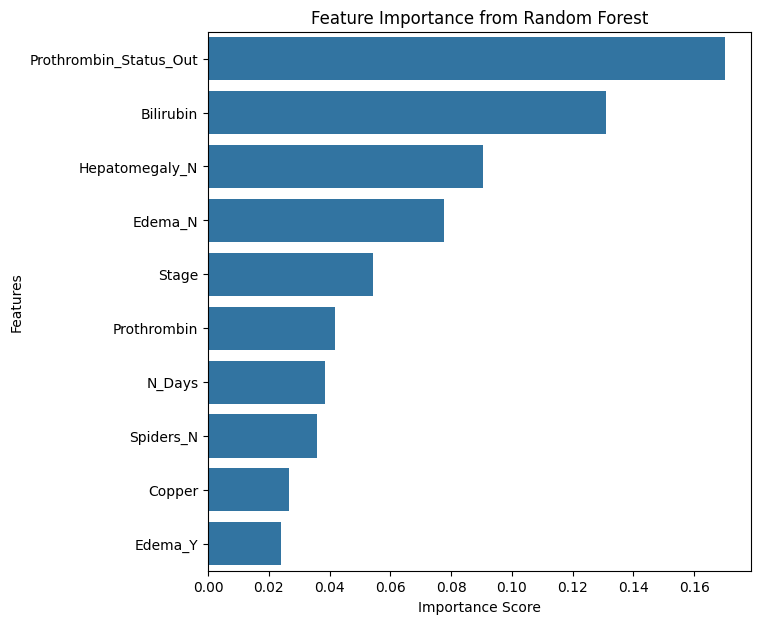

In [ ]:
# Get feature importances
feature_importances = pd.DataFrame({'Feature': X_train_final.columns, 'Importance': baseline.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False).head(10)
plt.figure(figsize=(7, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

It is clear the model is overfitting as training performs better than test. Regularization will be needed to curb this.

In [ ]:
le.classes_

array(['C', 'CL', 'D'], dtype=object)

In [ ]:
train_cm = confusion_matrix(y_true=y_train_encoded, y_pred=y_train_pred)
test_cm = confusion_matrix(y_true=y_test_encoded, y_pred=y_test_pred)

In [ ]:
train_cm

array([[3506,    3,  129],
       [  60,  130,   20],
       [ 298,    9, 1671]], dtype=int64)

In [ ]:
test_cm

array([[1405,    5,  149],
       [  43,   22,   25],
       [ 184,    6,  658]], dtype=int64)

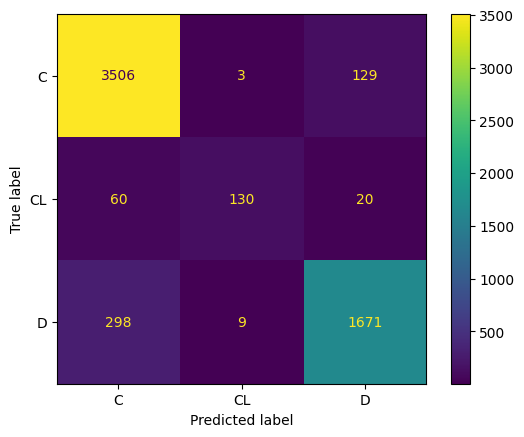

In [ ]:
ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=le.classes_).plot();

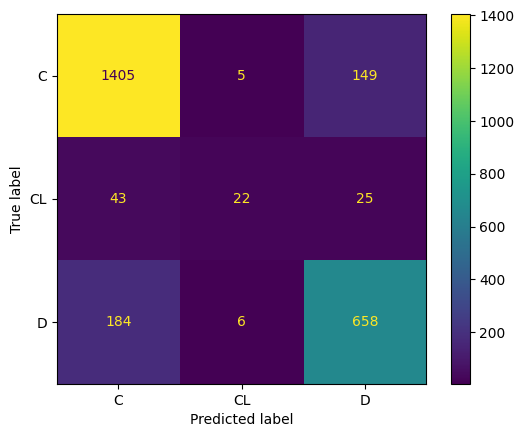

In [ ]:
ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=le.classes_).plot();

Also, class imbalance can be handles using scale_pos_weight

In [ ]:
le.classes_

array(['C', 'CL', 'D'], dtype=object)

In [ ]:
baseline_reg = XGBClassifier(learning_rate=0.2,
                             max_depth=3,
                             n_estimators=200,
                             use_label_encoder=False,
                             eval_metric='logloss',
                             reg_alpha=0.8,
                             reg_lambda=1.0,
                             random_state=42)
baseline_reg.fit(X_train_final, y_train_encoded)

c:\Users\njamb\Desktop\DataScience\CirrhosisPatientSurvivalPrediction\cirrhosisPred\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:09:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_train_pred_reg = baseline_reg.predict(X_train_final)
y_test_pred_reg = baseline_reg.predict(X_test_final)

# recall
train_recall_reg = recall_score(y_true=y_train_encoded, y_pred=y_train_pred_reg, average='weighted')
test_recall_reg = recall_score(y_true=y_test_encoded, y_pred=y_test_pred_reg, average='weighted')

print(f"Baseline XGBoost Model:")
print(f'Train Recall : {round(train_recall_reg, 3)}')
print(f'Test Recall : {round(test_recall_reg, 3)}')

Baseline XGBoost Model:
Train Recall : 0.905
Test Recall : 0.835


Model is still overfitting, so handling the cass imbalance will be the next step

In [ ]:
le.classes_

array(['C', 'CL', 'D'], dtype=object)

In [ ]:
class_counts = np.bincount(y_train_encoded)

In [ ]:
for i, count in enumerate(np.bincount(y_train_encoded)):
    print(i, count)

0 3638
1 210
2 1978


In [ ]:
max(class_counts)

3638

In [ ]:
scale_pos_weight = [max(class_counts)/count for count in class_counts]

In [ ]:
baseline_reg_weight = XGBClassifier(learning_rate=0.2,
                             max_depth=3,
                             n_estimators=200,
                             use_label_encoder=False,
                             eval_metric='logloss',
                             reg_alpha=0.8,
                             reg_lambda=1.0,
                             random_state=42,
                             scale_pos_weight=scale_pos_weight)
baseline_reg_weight.fit(X_train_final, y_train_encoded)

y_train_pred_reg_weight = baseline_reg_weight.predict(X_train_final)
y_test_pred_reg_weight = baseline_reg_weight.predict(X_test_final)

# recall
train_recall_reg_weight = recall_score(y_true=y_train_encoded, y_pred=y_train_pred_reg_weight, average='weighted')
test_recall_reg_weight = recall_score(y_true=y_test_encoded, y_pred=y_test_pred_reg_weight, average='weighted')

print(f"Baseline XGBoost Model:")
print(f'Train Recall : {round(train_recall_reg_weight, 3)}')
print(f'Test Recall : {round(test_recall_reg_weight, 3)}')

c:\Users\njamb\Desktop\DataScience\CirrhosisPatientSurvivalPrediction\cirrhosisPred\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:34:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Baseline XGBoost Model:
Train Recall : 0.905
Test Recall : 0.835


In [ ]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train),
    y=y_train
)

# Convert to dictionary
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}
print(class_weights_dict)


{0: 0.5338097855964816, 1: 9.247619047619047, 2: 0.9817997977755308}


In [ ]:
class_weights

array([0.53380979, 9.24761905, 0.9817998 ])

### 4.2.2 Deep Learning